# Time-Series Project: Rose

In [326]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from pandas import   read_csv, Grouper, DataFrame, concat
from datetime import datetime

from pylab import rcParams
rcParams['figure.figsize'] = 20,8

In [327]:
# Importing the necessary packages

import pandas                          as      pd
import numpy                           as      np
import matplotlib.pyplot               as      plt
import statsmodels.tools.eval_measures as      em
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt
from   IPython.display                 import display
from   pylab                           import rcParams
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Quaetion 1:
Read the data as an appropriate Time Series data and plot the data.

## Read the data from the '.csv' file as a monthly Time Series.

In [328]:
# the best method to download data in TS format. Entire code in single line.

# index_col -> can be used to force pandas to use the first column as the index
# squeeze : bool -> To notify Pandas that you're using a TS object and NOT a dataframe
# parse_dates : boolean (True) -> try parsing the index. 

df_original = pd.read_csv("Rose.csv",parse_dates=True, squeeze=True, index_col=0)

In [329]:
# df_1 is, now, in pandas DataFrame formate.

df_original = df_original.to_frame()
df_original

,Rose
YearMonth,
1980-01-01,112.00
1980-02-01,118.00
1980-03-01,129.00
1980-04-01,99.00
1980-05-01,116.00
...,...
1995-03-01,45.00
1995-04-01,52.00
1995-05-01,28.00


In [330]:
# rows & column in dataset
df_original.shape

(187, 1)

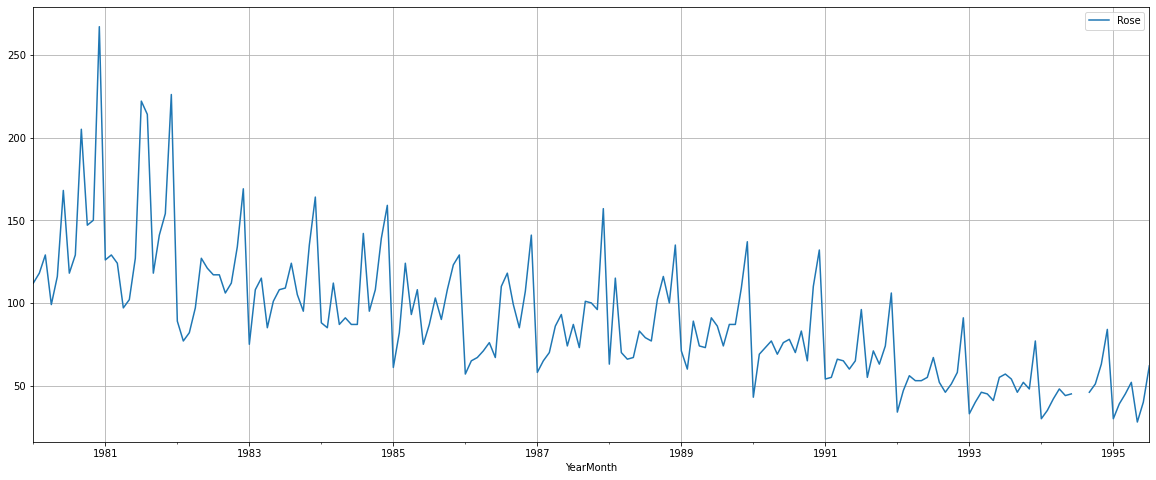

In [331]:
# this is time-series plot. Time is in x axis.  

from pylab import rcParams
rcParams['figure.figsize'] = 20,8
df_original.plot()
plt.grid();

In [332]:
# method 2 is usual way we have been downloading dataset.

df_2 = pd.read_csv("Rose.csv")

In [333]:
# this dataset is not TS dataset. Let's re-check on graph, if X-axis is time or something else.

df_2.head()

,YearMonth,Rose
0,1980-01,112.00
1,1980-02,118.00
2,1980-03,129.00
3,1980-04,99.00
4,1980-05,116.00


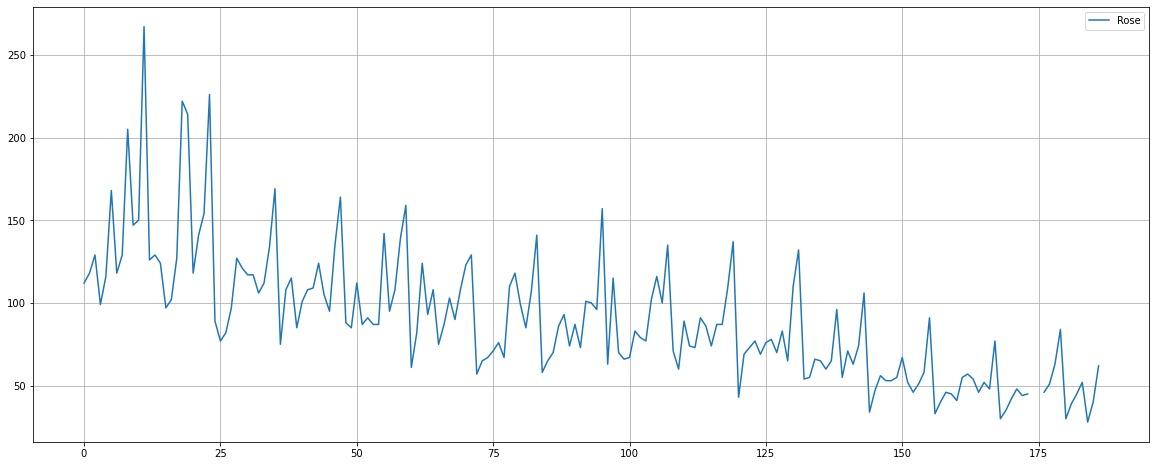

In [334]:
# this is NOT a time-series plot. Time is NOT in x-axis.
# we will have to make it a TS graph by adding date range manually.

df_2.plot();
plt.grid()

Though the above plot looks like a Time Series plot, notice that the X-Axis is not time. In order to make the X-Axis as a Time Series, we need to pass the date range manually through a command in Pandas.

## Creating the Time Stamps and adding to the data frame to make it a Time Series Data

In [335]:
# adding date range to make this a TS plot.
# time >> from 1st Jan 1956 and till 30th Aug 1995.

date = pd.date_range(start='1/1/1980', end='8/1/1995', freq='M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [336]:
# Time-Stamp is a column created from given 'Month' col in dataset.
# Time-Stamp is to make dataset Time-Series oriented.

df_2['Time_Stamp'] = pd.DataFrame(date,columns=['Month'])
df_2

,YearMonth,Rose,Time_Stamp
0,1980-01,112.00,1980-01-31
1,1980-02,118.00,1980-02-29
2,1980-03,129.00,1980-03-31
3,1980-04,99.00,1980-04-30
4,1980-05,116.00,1980-05-31
...,...,...,...
182,1995-03,45.00,1995-03-31
183,1995-04,52.00,1995-04-30
184,1995-05,28.00,1995-05-31
185,1995-06,40.00,1995-06-30


## Plot the Time Series to understand the behaviour of the data.

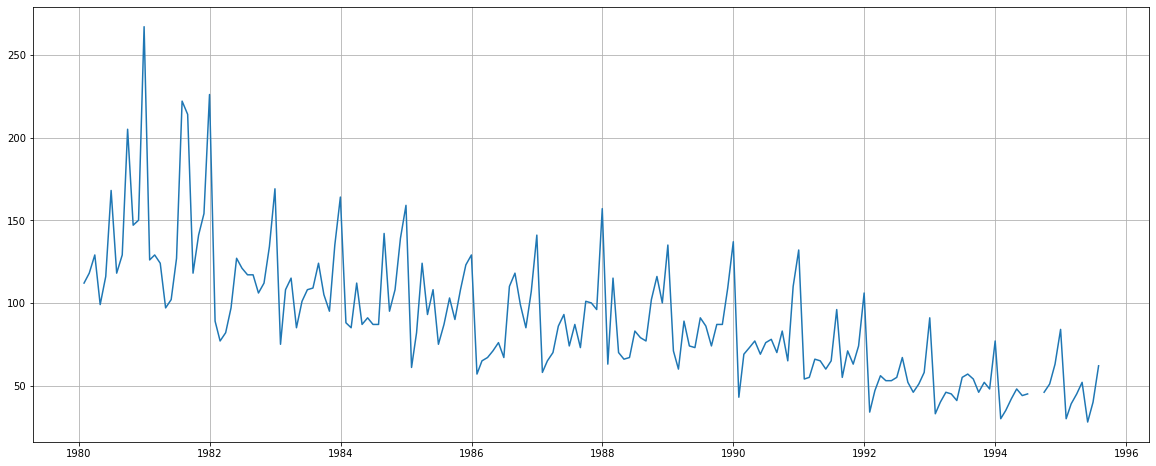

In [337]:
# Finally, this is converted into time-series data.
# Method -2 is a long process to convert data in TS plot. Method-1 is a short method to get the same.

plt.plot(df_2['Time_Stamp'],df_2['Rose']);
plt.grid()

Now that we have seen how to load the data from a '.csv' file as a Time Series object, let us go ahead and analyse the Time Series plot that we got

We can see that there is a slight downward trend with a seasonal pattern associated as well.

# Question 2:
Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

# check duplication of data.

In [160]:
df_2.duplicated().sum()

0

# check null value data.

In [161]:
df_original.isna().sum()

Rose    2
dtype: int64

In [162]:
df_original.tail(15).T

YearMonth,1994-05-01,1994-06-01,1994-07-01,1994-08-01,1994-09-01,1994-10-01,1994-11-01,1994-12-01,1995-01-01,1995-02-01,1995-03-01,1995-04-01,1995-05-01,1995-06-01,1995-07-01
Rose,44.00,45.00,nan,nan,46.00,51.00,63.00,84.00,30.00,39.00,45.00,52.00,28.00,40.00,62.00


In [163]:
df_1= df_original.interpolate(method='spline', order=3)
df_1.tail(15).round(1).T

YearMonth,1994-05-01,1994-06-01,1994-07-01,1994-08-01,1994-09-01,1994-10-01,1994-11-01,1994-12-01,1995-01-01,1995-02-01,1995-03-01,1995-04-01,1995-05-01,1995-06-01,1995-07-01
Rose,44.00,45.00,43.70,44.40,46.00,51.00,63.00,84.00,30.00,39.00,45.00,52.00,28.00,40.00,62.00


In [164]:
df_1.isna().sum()

Rose    0
dtype: int64

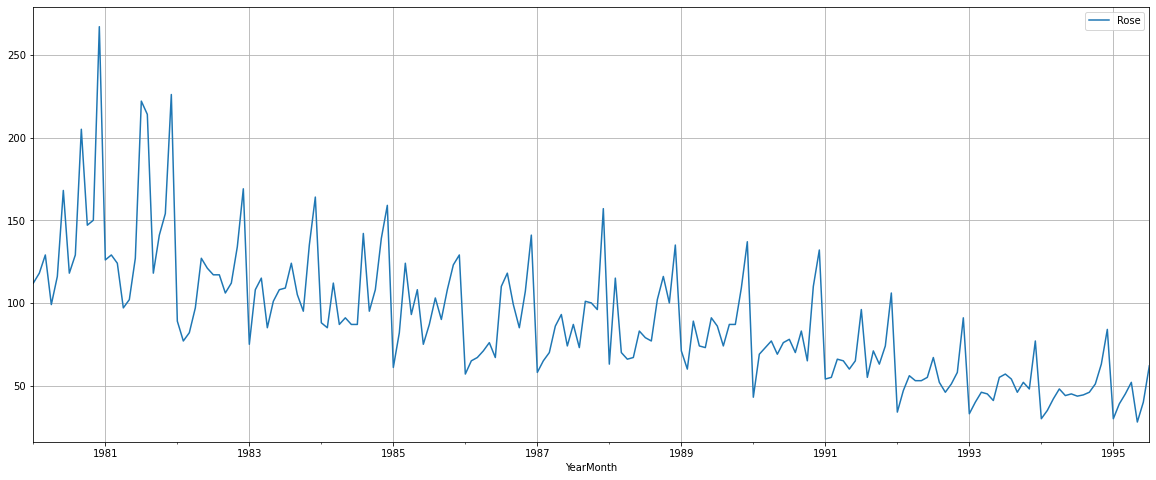

In [323]:
# Reprinting time-series plot after treating null values.  

from pylab import rcParams
rcParams['figure.figsize'] = 20,8
df_1.plot()
plt.grid();

**No gap in the time-series confirming plot doesnt have any null value.**

## Check the basic measures of descriptive statistics

In [165]:
df_1.describe().T

,count,mean,std,min,25%,50%,75%,max
Rose,187.00,89.90,39.26,28.00,62.50,85.00,111.00,267.00


The basic measures of descriptive statistics tell us how the Sales have varied across years. But remember, for this measure of descriptive statistics we have averaged over the whole data without taking the time component into account.

## Plot a boxplot to understand the spread of accidents across different years and within different months across years.

### Yearly Boxplot

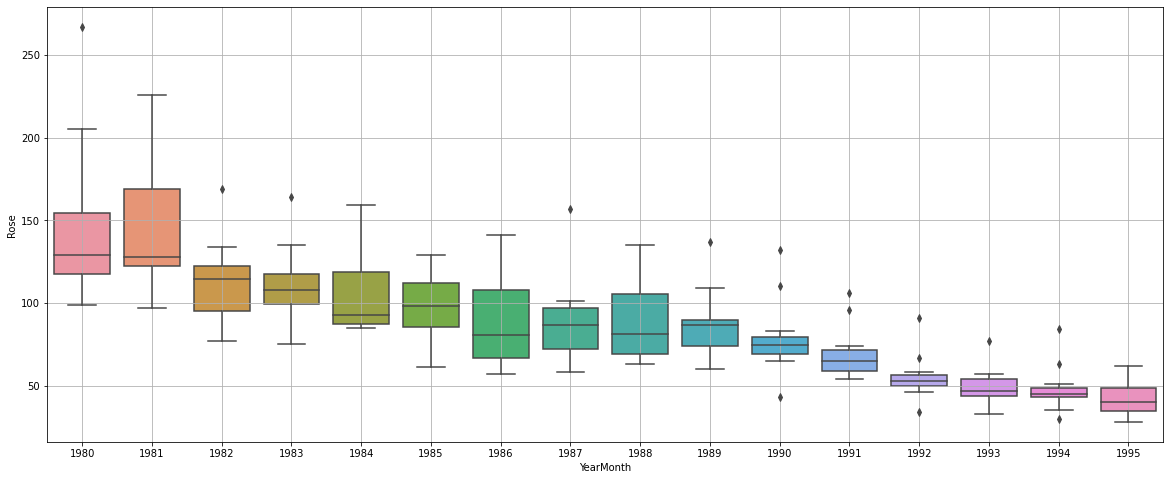

In [166]:
sns.boxplot(x = df_1.index.year,y = df_1['Rose'])
plt.grid();

The yearly boxplots also shows that the Sales have decreased towards the last few years.

### Monthly Plot

## Plot a time series monthplot to understand the spread of ROSE sales across different years and within different months across years.

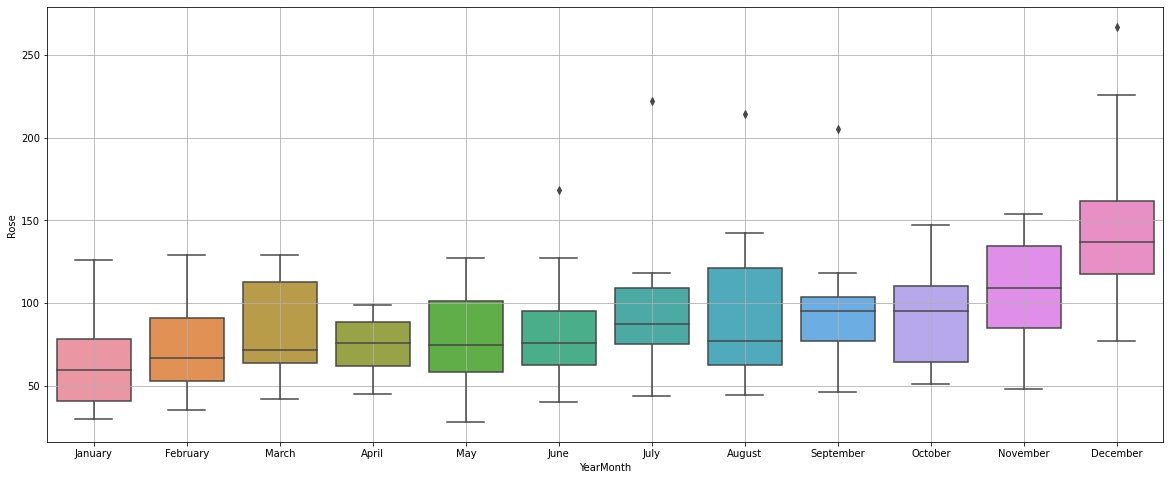

In [167]:
sns.boxplot(x = df_1.index.month_name(),y = df_1['Rose'])
plt.grid();

There is a clear distinction of 'RetailSales' within different months spread across various years. The highest such numbers are being recorded in the month of July-August across various years.

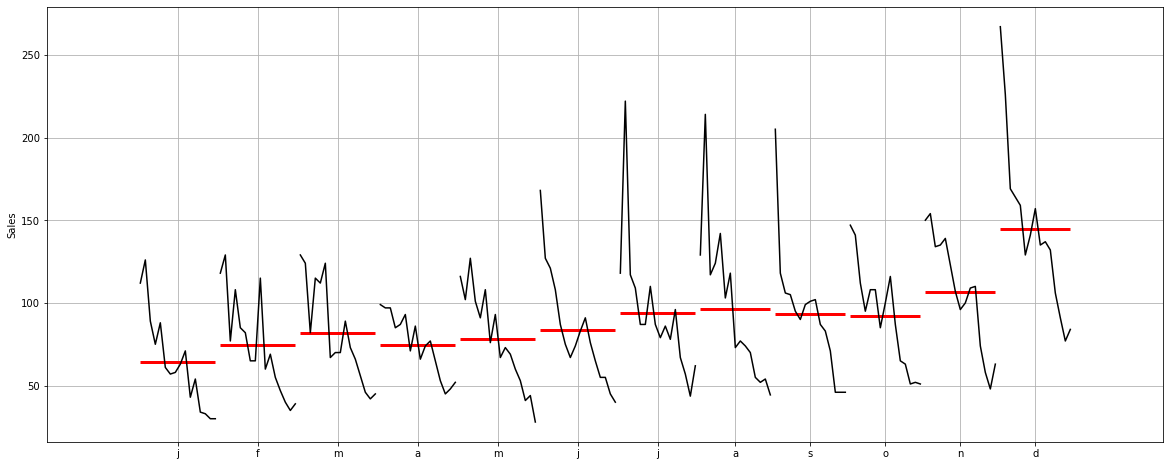

In [168]:
from statsmodels.graphics.tsaplots import month_plot

month_plot(df_1['Rose'],ylabel='Sales')
plt.grid();

This plot shows us the behaviour of the Time Series ('RetailSales' in this case) across various months. The red line is the median value.

## Plot a table of monthly Rose sales across years.

In [169]:
monthly_sales_across_years = pd.pivot_table(df_1, values = 'Rose', columns = df_1.index.month, index = df_1.index.year)
monthly_sales_across_years.round(1)

YearMonth,1,2,3,4,5,6,7,8,9,10,11,12
YearMonth,,,,,,,,,,,,
1980,112.00,118.00,129.00,99.00,116.00,168.00,118.00,129.00,205.00,147.00,150.00,267.00
1981,126.00,129.00,124.00,97.00,102.00,127.00,222.00,214.00,118.00,141.00,154.00,226.00
1982,89.00,77.00,82.00,97.00,127.00,121.00,117.00,117.00,106.00,112.00,134.00,169.00
1983,75.00,108.00,115.00,85.00,101.00,108.00,109.00,124.00,105.00,95.00,135.00,164.00
1984,88.00,85.00,112.00,87.00,91.00,87.00,87.00,142.00,95.00,108.00,139.00,159.00
1985,61.00,82.00,124.00,93.00,108.00,75.00,87.00,103.00,90.00,108.00,123.00,129.00
1986,57.00,65.00,67.00,71.00,76.00,67.00,110.00,118.00,99.00,85.00,107.00,141.00
1987,58.00,65.00,70.00,86.00,93.00,74.00,87.00,73.00,101.00,100.00,96.00,157.00
1988,63.00,115.00,70.00,66.00,67.00,83.00,79.00,77.00,102.00,116.00,100.00,135.00


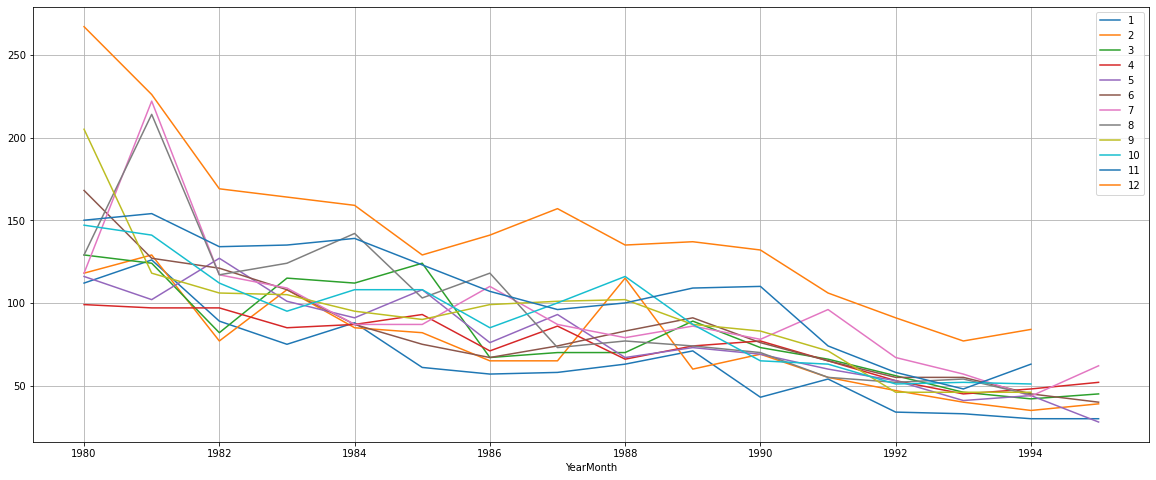

In [170]:
monthly_sales_across_years.plot()
plt.grid()
plt.legend(loc='best');

## Plot the Empirical Cumulative Distribution.

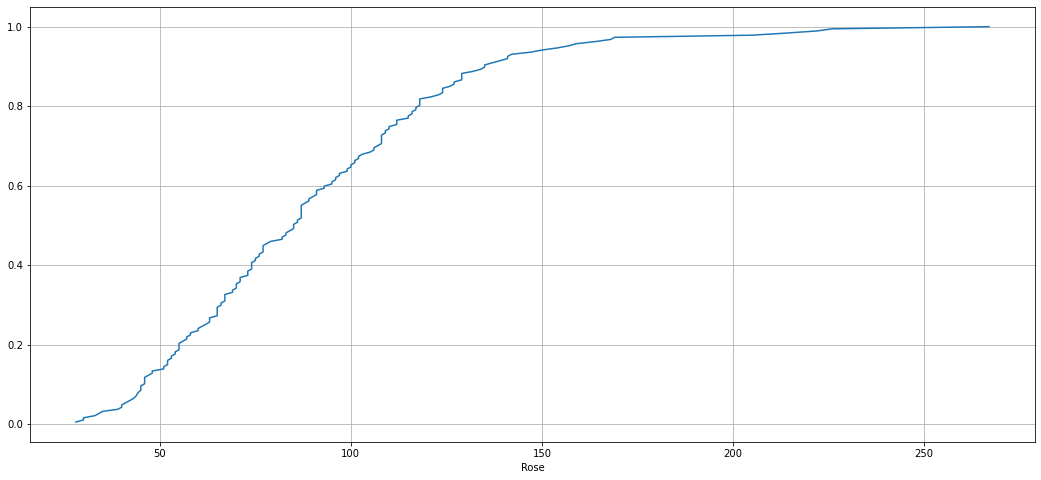

In [171]:
# statistics
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (18, 8))
cdf = ECDF(df_1['Rose'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Rose');

This particular graph tells us what percentage of data points refer to what number of Sales.

## Plot the average Rose sales per month and the month on month percentage change of the same.

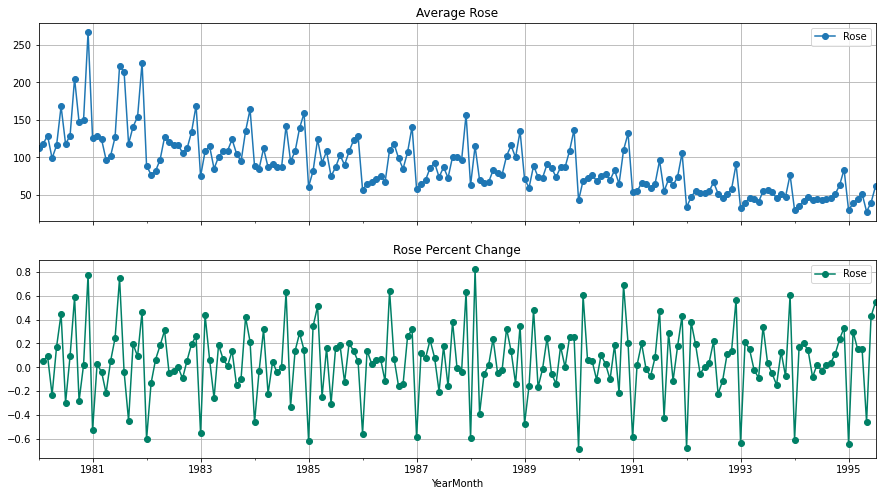

In [172]:
# group by date and get average RetailSales, and precent change
average    = df_1.groupby(df_1.index)["Rose"].mean()
pct_change = df_1.groupby(df_1.index)["Rose"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average Sparkling over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Rose",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for Sparkling over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Rose Percent Change",grid=True)

The above two graphs tells us the Average 'RetailSales' and the Percentage change of 'RetailSales' with respect to the time.

## Decompose the Time Series and plot the different components.

In [173]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

### Additive Decomposition

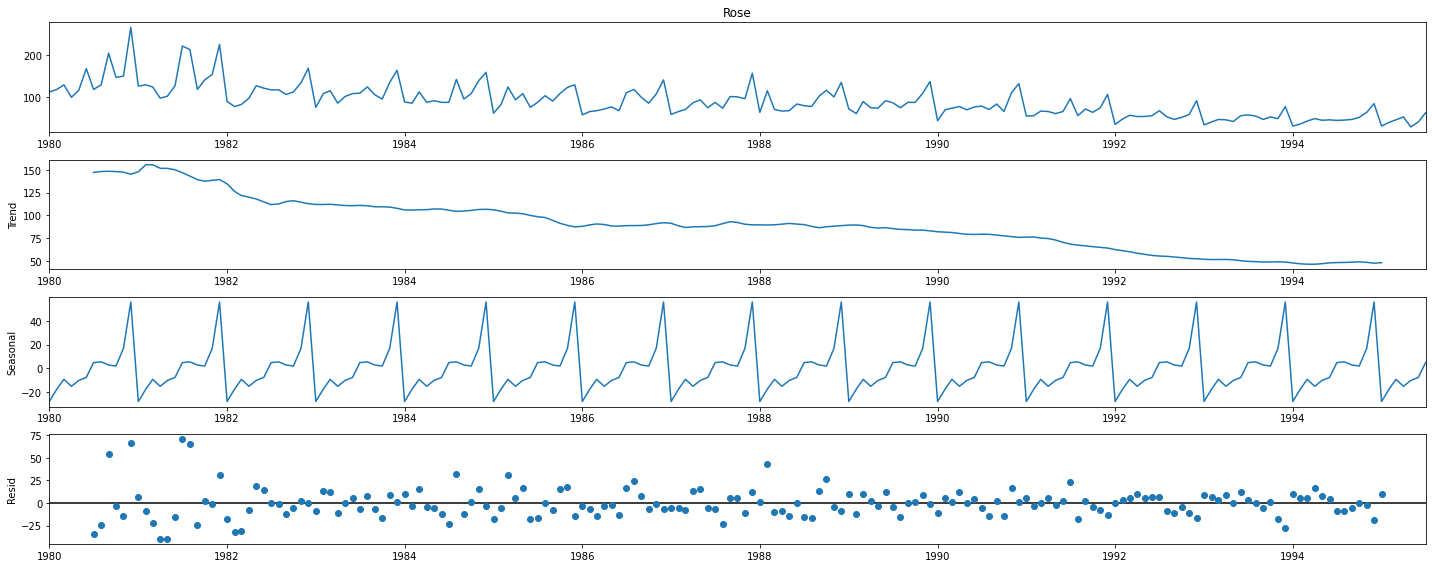

In [174]:
decomposition_a = seasonal_decompose(df_1['Rose'],model='additive')
decomposition_a.plot();

We see that the residuals are located around 0 from the plot of the residuals in the decomposition.

In [175]:
trend_a = decomposition_a.trend
seasonality_a = decomposition_a.seasonal
residual_a = decomposition_a.resid


In [176]:
print('Trend','\n',trend_a.head(12),'\n')
print('Seasonality','\n',seasonality_a.head(12),'\n')
print('Residual','\n',residual_a.head(12),'\n')

Trend 
 YearMonth
1980-01-01      nan
1980-02-01      nan
1980-03-01      nan
1980-04-01      nan
1980-05-01      nan
1980-06-01      nan
1980-07-01   147.08
1980-08-01   148.12
1980-09-01   148.38
1980-10-01   148.08
1980-11-01   147.42
1980-12-01   145.12
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01   -27.89
1980-02-01   -17.42
1980-03-01    -9.27
1980-04-01   -15.08
1980-05-01   -10.18
1980-06-01    -7.66
1980-07-01     4.80
1980-08-01     5.43
1980-09-01     2.79
1980-10-01     1.89
1980-11-01    16.86
1980-12-01    55.73
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01      nan
1980-02-01      nan
1980-03-01      nan
1980-04-01      nan
1980-05-01      nan
1980-06-01      nan
1980-07-01   -33.88
1980-08-01   -24.56
1980-09-01    53.83
1980-10-01    -2.97
1980-11-01   -14.28
1980-12-01    66.15
Name: resid, dtype: float64 



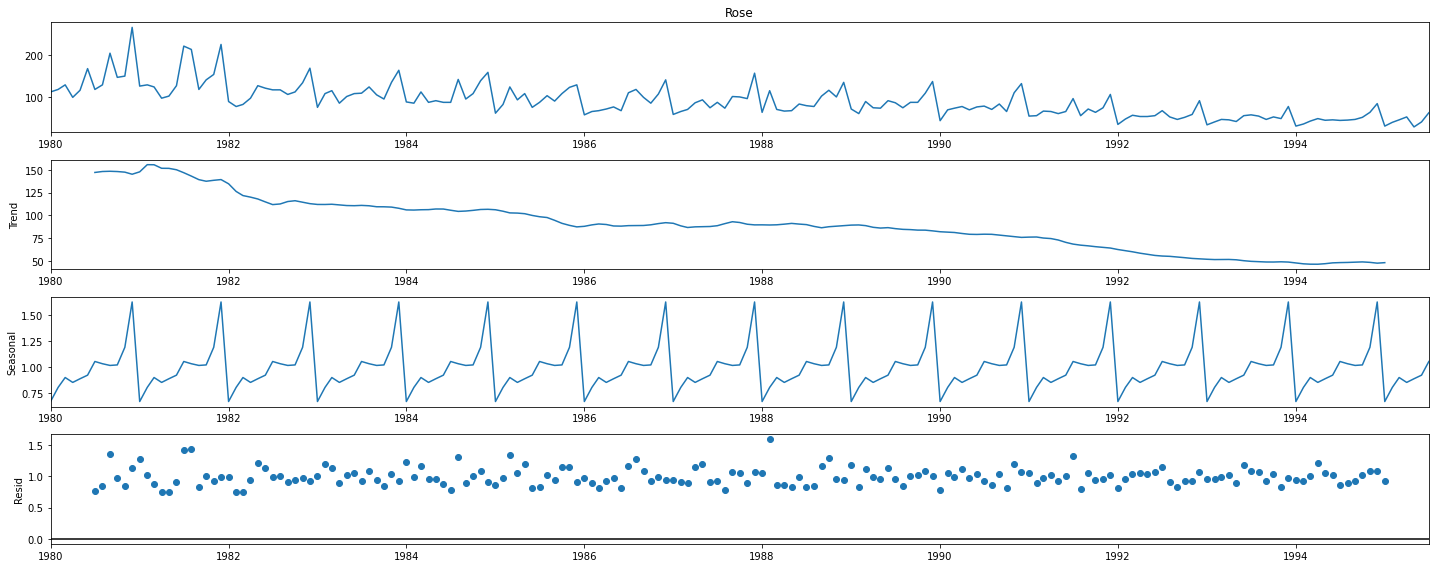

In [177]:
decomposition_m = seasonal_decompose(df_1['Rose'],model='multiplicative')
decomposition_m.plot();

For the multiplicative series, we see that a lot of residuals are located around 1.

In [178]:
trend_m = decomposition_m.trend
seasonality_m = decomposition_m.seasonal
residual_m = decomposition_m.resid


In [179]:
print('Trend','\n',trend_m.head(12),'\n')
print('Seasonality','\n',seasonality_m.head(12),'\n')
print('Residual','\n',residual_m.head(12),'\n')

Trend 
 YearMonth
1980-01-01      nan
1980-02-01      nan
1980-03-01      nan
1980-04-01      nan
1980-05-01      nan
1980-06-01      nan
1980-07-01   147.08
1980-08-01   148.12
1980-09-01   148.38
1980-10-01   148.08
1980-11-01   147.42
1980-12-01   145.12
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01   0.67
1980-02-01   0.81
1980-03-01   0.90
1980-04-01   0.85
1980-05-01   0.89
1980-06-01   0.92
1980-07-01   1.06
1980-08-01   1.03
1980-09-01   1.02
1980-10-01   1.02
1980-11-01   1.19
1980-12-01   1.63
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01    nan
1980-02-01    nan
1980-03-01    nan
1980-04-01    nan
1980-05-01    nan
1980-06-01    nan
1980-07-01   0.76
1980-08-01   0.84
1980-09-01   1.36
1980-10-01   0.97
1980-11-01   0.85
1980-12-01   1.13
Name: resid, dtype: float64 



# Question 3:
Split the data into training and test. The test data should start in 1991.

## Split the data into train and test and plot the training and test data.

Training Data is till the end of 1990. Test Data is from the beginning of 1991 to the last time stamp provided.

In [180]:
train = df_1[df_1.index.year < 1991]
test = df_1[df_1.index.year >= 1991]

In [181]:
## This is to display multiple data frames from one cell
from IPython.display import display

In [324]:
print('First few rows of Training Data')
display(train.head())
print('\n')
print('Last few rows of Training Data')
display(train.tail())
print('\n')
print('First few rows of Test Data')
display(test.head())
print('\n')
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,Rose
YearMonth,
1980-01-01,112.00
1980-02-01,118.00
1980-03-01,129.00
1980-04-01,99.00
1980-05-01,116.00




Last few rows of Training Data


,Rose
YearMonth,
1990-08-01,70.00
1990-09-01,83.00
1990-10-01,65.00
1990-11-01,110.00
1990-12-01,132.00




First few rows of Test Data


,Rose
YearMonth,
1991-01-01,54.00
1991-02-01,55.00
1991-03-01,66.00
1991-04-01,65.00
1991-05-01,60.00




Last few rows of Test Data


,Rose
YearMonth,
1995-03-01,45.00
1995-04-01,52.00
1995-05-01,28.00
1995-06-01,40.00
1995-07-01,62.00


In [183]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


In [184]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-01 to 1990-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    132 non-null    float64
dtypes: float64(1)
memory usage: 2.1 KB


In [185]:
# train['Sparkling']

In [186]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 55 entries, 1991-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    55 non-null     float64
dtypes: float64(1)
memory usage: 880.0 bytes


4. Build various exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models, simple average models etc. should also be built on the training data and check the performance on the test data using RMSE.\
Please do try to build as many models as possible and as many iterations of models as possible with different parameters.

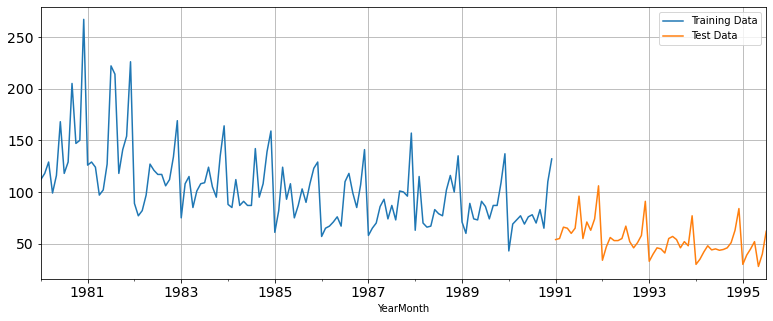

In [187]:
train['Rose'].plot(figsize=(13,5), fontsize=14)
test['Rose'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

##### Note: It is difficult to predict the future observations if such an instance has not happened in the past. From our train-test split we are predicting likewise behaviour as compared to the past years.

# Building different models and comparing the accuracy metrics.

## Model 1: Linear Regression

#### For this particular linear regression, we are going to regress the 'Sales' variable against the order of the occurrence. For this we need to modify our training data before fitting it into a linear regression.

In [188]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('\n')
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]


Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


We see that we have successfully the generated the numerical time instance order for both the training and test set. Now we will add these values in the training and test set.

In [189]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [190]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
              Rose  time
YearMonth              
1980-01-01 112.00     1
1980-02-01 118.00     2
1980-03-01 129.00     3
1980-04-01  99.00     4
1980-05-01 116.00     5 

Last few rows of Training Data 
              Rose  time
YearMonth              
1990-08-01  70.00   128
1990-09-01  83.00   129
1990-10-01  65.00   130
1990-11-01 110.00   131
1990-12-01 132.00   132 

First few rows of Test Data 
             Rose  time
YearMonth             
1991-01-01 54.00   133
1991-02-01 55.00   134
1991-03-01 66.00   135
1991-04-01 65.00   136
1991-05-01 60.00   137 

Last few rows of Test Data 
             Rose  time
YearMonth             
1995-03-01 45.00   183
1995-04-01 52.00   184
1995-05-01 28.00   185
1995-06-01 40.00   186
1995-07-01 62.00   187 



Now that our training and test data has been modified, let us go ahead use $\underline{Linear Regression}$ to build the model on the training data and test the model on the test data.

In [191]:
from sklearn.linear_model import LinearRegression

In [192]:
lr = LinearRegression()

In [193]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'].values)

LinearRegression()

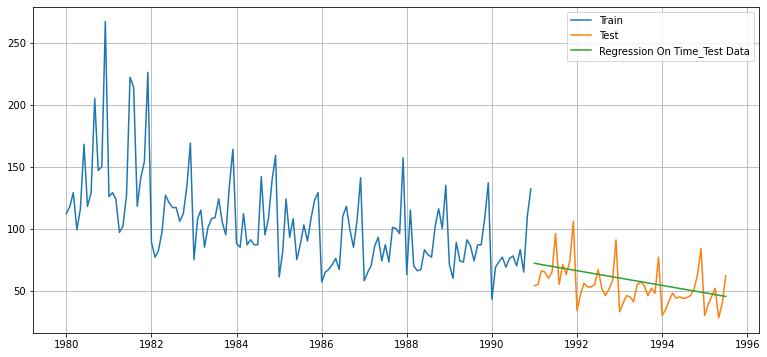

In [194]:
test_predictions_model1 = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

#### Defining the accuracy metrics.

In [195]:
from sklearn import metrics

### Model Evaluation

In [196]:
## Test Data - RMSE

rmse_model1_test = metrics.mean_squared_error(test['Rose'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 15.291


In [376]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

,Test RMSE
RegressionOnTime,15.29


## Model 2: Naive Approach: $\hat{y}_{t+1} = y_t$

#### For this particular naive model, we say that the prediction for tomorrow is the same as today and the prediction for day after tomorrow is tomorrow and since the prediction of tomorrow is same as today,therefore the prediction for day after tomorrow is also today.

In [198]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [199]:
NaiveModel_test['naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01   132.00
1991-02-01   132.00
1991-03-01   132.00
1991-04-01   132.00
1991-05-01   132.00
Name: naive, dtype: float64

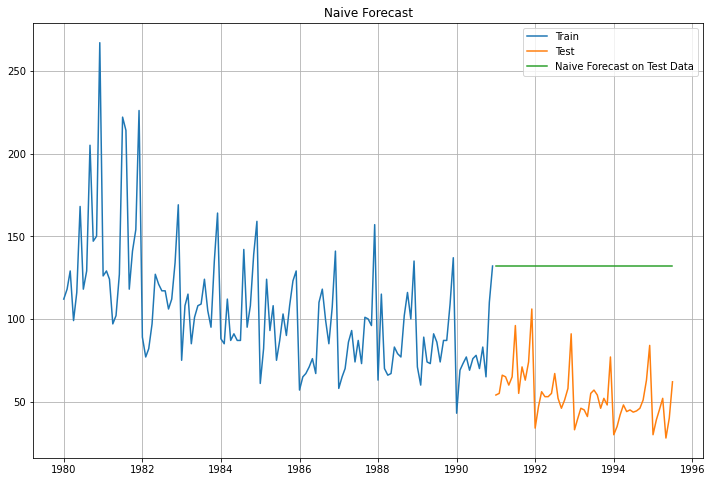

In [200]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

### Model Evaluation

In [201]:
## Test Data - RMSE

rmse_model2_test = metrics.mean_squared_error(test['Rose'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 79.777


In [377]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Test RMSE
RegressionOnTime,15.29
NaiveModel,79.78


## Method 3: Simple Average

#### For this particular simple average method, we will forecast by using the average of the training values.

In [203]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [204]:
SimpleAverage_test['mean_forecast'] = train['Rose'].mean()
SimpleAverage_test.head()

,Rose,mean_forecast
YearMonth,,
1991-01-01,54.00,104.94
1991-02-01,55.00,104.94
1991-03-01,66.00,104.94
1991-04-01,65.00,104.94
1991-05-01,60.00,104.94


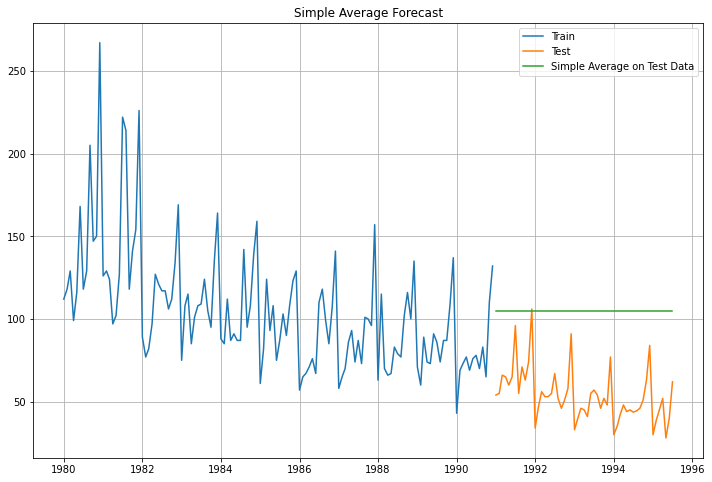

In [205]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

### Model Evaluation

In [206]:
## Test Data - RMSE 

rmse_model3_test = metrics.mean_squared_error(test['Rose'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 53.521


In [378]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE
RegressionOnTime,15.29
NaiveModel,79.78
SimpleAverageModel,53.52


## Method 4: Moving Average(MA)

#### For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here.

###### For Moving Average, we are going to average over the entire data.

In [208]:
MovingAverage = df_1.copy()
MovingAverage.head()

,Rose
YearMonth,
1980-01-01,112.00
1980-02-01,118.00
1980-03-01,129.00
1980-04-01,99.00
1980-05-01,116.00


#### Trailing moving averages

In [209]:

MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()

MovingAverage

,Rose,Trailing_2,Trailing_4,Trailing_6,Trailing_9
YearMonth,,,,,
1980-01-01,112.00,nan,nan,nan,nan
1980-02-01,118.00,115.00,nan,nan,nan
1980-03-01,129.00,123.50,nan,nan,nan
1980-04-01,99.00,114.00,114.50,nan,nan
1980-05-01,116.00,107.50,115.50,nan,nan
...,...,...,...,...,...
1995-03-01,45.00,42.00,49.50,52.00,49.56
1995-04-01,52.00,48.50,41.50,52.17,50.49
1995-05-01,28.00,40.00,41.00,46.33,48.67


Let us split the data into train and test and plot this Time Series. The window of the moving average is need to be carefully selected as too big a window will result in not having any test set as the whole series might get averaged over.

In [210]:
#Creating train and test set 
trailing_MovingAverage_train = MovingAverage[df_1.index.year < 1991] 
trailing_MovingAverage_test = MovingAverage[df_1.index.year >= 1991]


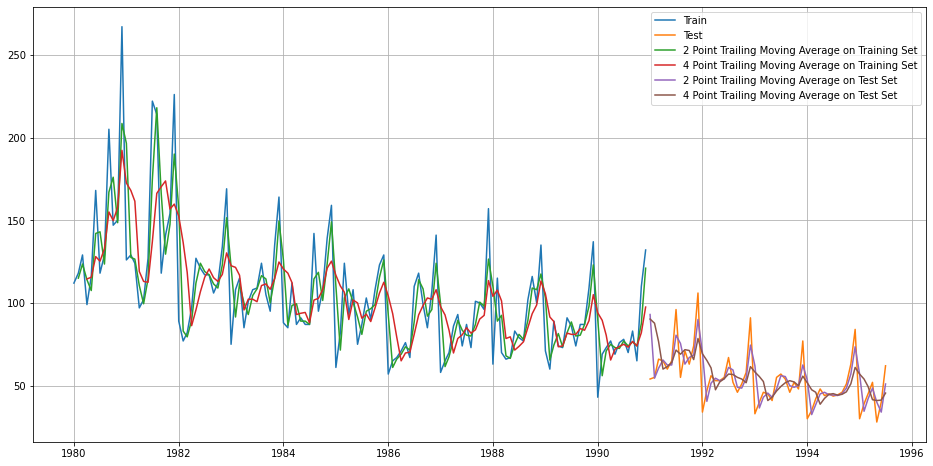

In [211]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
# plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
# plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
# plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
# plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

### Model Evaluation

##### Done only on the test data.

In [212]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

# Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE  --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f " %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 11.530
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 14.462
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 14.587
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 14.740 


In [379]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2, rmse_model4_test_4, 
                                          rmse_model4_test_6, rmse_model4_test_9]}
 ,index=['2 pointTrailingMovingAverage','4 pointTrailingMovingAverage', 
         '6 pointTrailingMovingAverage', '9 pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4]) 
resultsDf

,Test RMSE
RegressionOnTime,15.29
NaiveModel,79.78
SimpleAverageModel,53.52
2 pointTrailingMovingAverage,11.53
4 pointTrailingMovingAverage,14.46
6 pointTrailingMovingAverage,14.59
9 pointTrailingMovingAverage,14.74


## Before we go on to build the various Exponential Smoothing models, let us plot all the models and compare the Time Series plots.

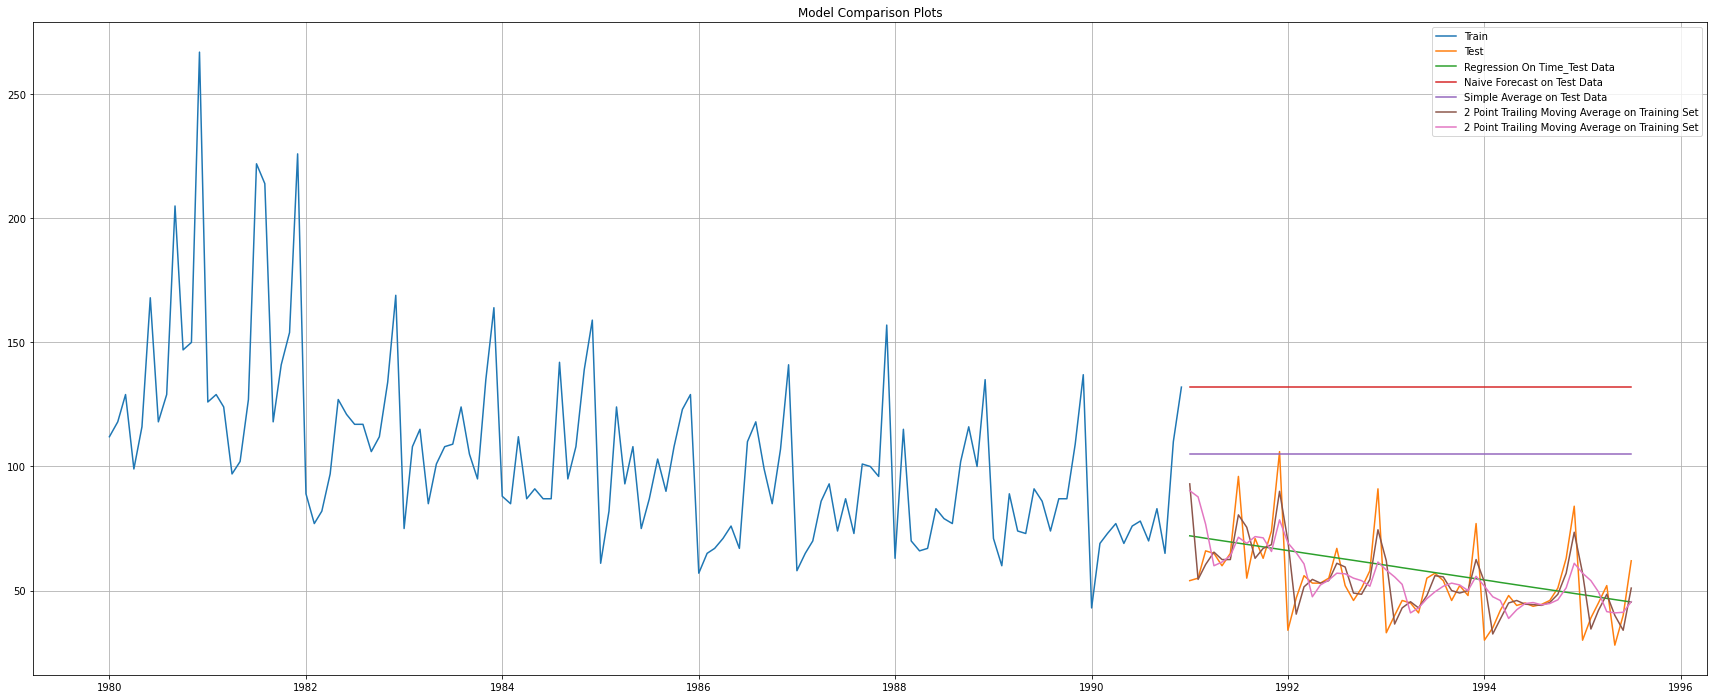

In [214]:
## Plotting on both Training and Test data

plt.figure(figsize=(30,12))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_4'], label='2 Point Trailing Moving Average on Training Set')

plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

## Method 5: Simple Exponential Smoothing

In [215]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [216]:
SES_train = train.copy()
SES_test = test.copy()

In [217]:
model_SES = SimpleExpSmoothing(SES_train['Rose'])

In [218]:
model_SES_autofit = model_SES.fit(optimized=True)

In [219]:
model_SES_autofit.params

{'smoothing_level': 0.0987493111726833,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.38720226208358,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [220]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
pd.options.display.float_format = '{:.2f}'.format
# SES_test
SES_test.head() 

,Rose,predict
YearMonth,,
1991-01-01,54.00,87.10
1991-02-01,55.00,87.10
1991-03-01,66.00,87.10
1991-04-01,65.00,87.10
1991-05-01,60.00,87.10


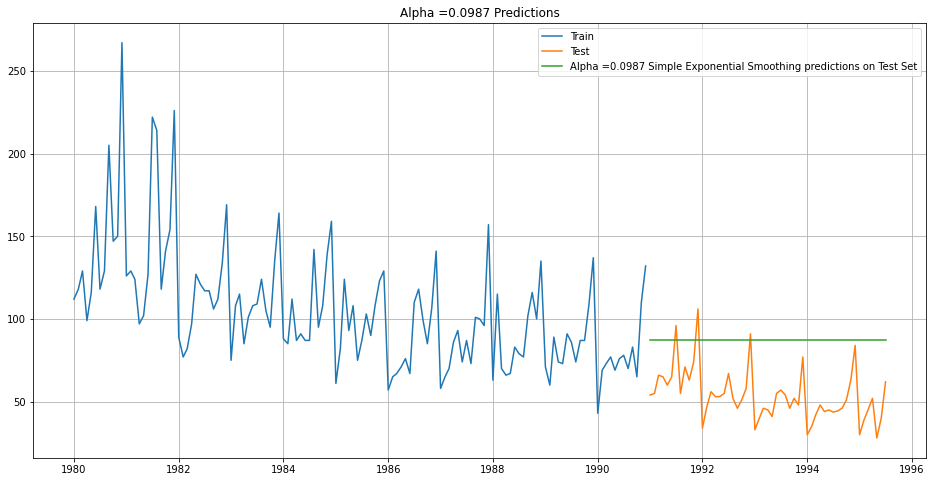

In [221]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.0987 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.0987 Predictions');

### Model Evaluation for $\alpha$ = 0.0987 : Simple Exponential Smoothing

In [222]:
## Test Data

rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict'],squared=False)
print("For Alpha =0.0987 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))


For Alpha =0.0987 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 36.858


In [380]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1]},index=['Alpha=0.0987, SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

,Test RMSE
RegressionOnTime,15.29
NaiveModel,79.78
SimpleAverageModel,53.52
2 pointTrailingMovingAverage,11.53
4 pointTrailingMovingAverage,14.46
6 pointTrailingMovingAverage,14.59
9 pointTrailingMovingAverage,14.74
"Alpha=0.0987, SimpleExponentialSmoothing",36.86


# Setting different alpha values.

###### Remember, the higher the alpha value more weightage is given to the more recent observation. That means, what happened recently will happen again.


#### We will run a loop with different alpha values to understand which particular value works best for alpha on the test set.

In [224]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_6

,Alpha Values,Train RMSE,Test RMSE


In [359]:
for i in np.arange(0.01,1,0.01):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=55) # 55 test rows in this data.
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['Rose'],SES_train['predict',i],squared=False)
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict',i],squared=False)
    
    resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i 
                                      ,'Test RMSE':rmse_model5_test_i}, ignore_index=True)

## Model Evaluation

In [367]:
resultsDf_6.sort_values(by=['Test RMSE'],ascending=True).head(20)

,Alpha Values,Train RMSE,Test RMSE
13,0.07,32.05,36.50
14,0.08,31.94,36.52
12,0.06,32.21,36.64
15,0.09,31.86,36.67
16,0.10,31.82,36.89
11,0.05,32.45,37.07
17,0.11,31.79,37.18
18,0.12,31.78,37.52
19,0.13,31.78,37.90
10,0.04,32.81,38.02


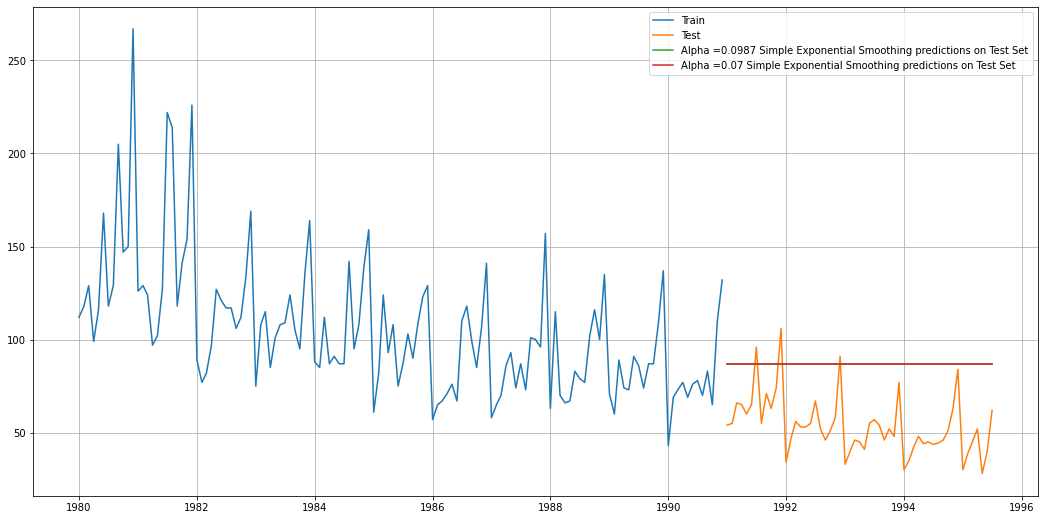

In [374]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.0987 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_test['predict', 0.08], label='Alpha =0.07 Simple Exponential Smoothing predictions on Test Set')



plt.legend(loc='best')
plt.grid();

In [381]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                           ,index=['Alpha=0.07, SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

,Test RMSE
RegressionOnTime,15.29
NaiveModel,79.78
SimpleAverageModel,53.52
2 pointTrailingMovingAverage,11.53
4 pointTrailingMovingAverage,14.46
6 pointTrailingMovingAverage,14.59
9 pointTrailingMovingAverage,14.74
"Alpha=0.0987, SimpleExponentialSmoothing",36.86
"Alpha=0.07, SimpleExponentialSmoothing",36.50


## Method 6: Double Exponential Smoothing (Holt's Model)

##### Two parameters $\alpha$ and $\beta$ are estimated in this model. Level and Trend are accounted for in this model.

In [229]:
pip show statsmodels

Name: statsmodels
Version: 0.12.0
Summary: Statistical computations and models for Python
Home-page: https://www.statsmodels.org/
Author: None
Author-email: None
License: BSD License
Location: c:\users\gupta\anaconda3\lib\site-packages
Requires: numpy, scipy, pandas, patsy
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [230]:
# pip install statsmodels==0.12.0

In [231]:
DES_train = train.copy()
DES_test = test.copy()

In [232]:
model_DES = Holt(DES_train['Rose'])

In [233]:
model_DES_autofit = model_DES.fit(optimized=True)

In [234]:
model_DES_autofit.params

{'smoothing_level': 0.017549790270679714,
 'smoothing_trend': 3.236153800377395e-05,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 138.82081494774005,
 'initial_trend': -0.492580228245491,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [235]:
DES_test['predict'] = model_DES_autofit.forecast(steps=len(test))
pd.options.display.float_format = '{:.2f}'.format
# DES_test
DES_test.head() # dont print this code with head().

,Rose,predict
YearMonth,,
1991-01-01,54.00,73.26
1991-02-01,55.00,72.77
1991-03-01,66.00,72.27
1991-04-01,65.00,71.78
1991-05-01,60.00,71.29


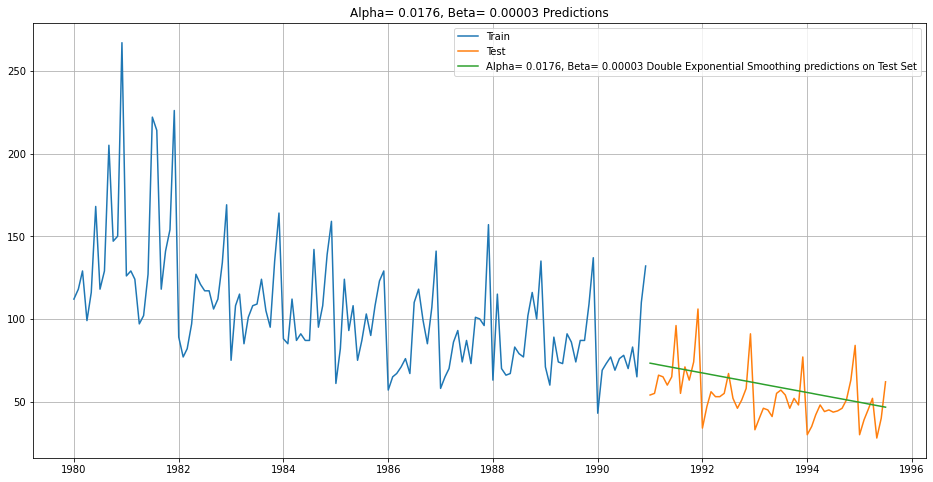

In [236]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(DES_train['Rose'], label='Train')
plt.plot(DES_test['Rose'], label='Test')

plt.plot(DES_test['predict'], label='Alpha= 0.0176, Beta= 0.00003 Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha= 0.0176, Beta= 0.00003 Predictions');

### Model Evaluation for $\alpha$ = 0.0176, $\beta$ = 0.00003 Double Exponential Smoothing

In [237]:
## Test Data

rmse_model7a_test_1 = metrics.mean_squared_error(DES_test['Rose'],DES_test['predict'],squared=False)
print("For Alpha= 0.0176, Beta= 0.00003 Double Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model7a_test_1))


For Alpha= 0.0176, Beta= 0.00003 Double Exponential Smoothing Model forecast on the Test Data, RMSE is 15.733


In [238]:
resultsDf_7a = pd.DataFrame({'Test RMSE': [rmse_model7a_test_1]},index=['Alpha= 0.0176, Beta= 0.00003 Double Exponential Smoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7a])
resultsDf

,Test RMSE
RegressionOnTime,15.29
NaiveModel,79.78
SimpleAverageModel,53.52
2 pointTrailingMovingAverage,11.53
4 pointTrailingMovingAverage,14.46
6 pointTrailingMovingAverage,14.59
9 pointTrailingMovingAverage,14.74
"Alpha=0.0987, SimpleExponentialSmoothing",36.86
"Alpha=0.3, SimpleExponentialSmoothing",47.57
"Alpha= 0.0176, Beta= 0.00003 Double Exponential Smoothing",15.73


# Setting different Alpha and Beta values. 

###### Remember, the higher the alpha value more weightage is given to the more recent observation. That means, what happened recently will happen again.


#### We will run a loop with different alpha values to understand which particular value works best for alpha & beta on the test set.

In [239]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7

,Alpha Values,Beta Values,Train RMSE,Test RMSE


In [387]:
# for i in np.arange(0.1,1,0.05):
#     for j in np.arange(0.01,1,0.01):

for i in np.arange(0.01,0.5,0.01):
    for j in np.arange(0.01,0.9,0.01):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i, smoothing_trend=j, optimized=False, use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=55)
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['Rose'],DES_train['predict',i,j],squared=False)
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['Rose'],DES_test['predict',i,j],squared=False)
        
        resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
                                          ,'Test RMSE':rmse_model6_test}, ignore_index=True)

In [388]:
# pd.options.display.float_format = '{:.2f}'.format
# resultsDf_7

Let us sort the data frame in the ascending ordering of the 'Test RMSE' and the 'Test MAPE' values.

In [393]:
resultsDf_7.sort_values(by=['Test RMSE']).head(10)

,Alpha Values,Beta Values,Train RMSE,Test RMSE
2778,0.04,0.47,37.39,14.58
257,0.04,0.47,37.39,14.58
186,0.03,0.25,43.73,14.70
2667,0.03,0.25,43.73,14.70
2707,0.03,0.65,39.31,14.73
2735,0.04,0.04,61.52,14.89
214,0.04,0.04,61.52,14.89
2777,0.04,0.46,37.49,14.90
256,0.04,0.46,37.49,14.90
151,0.02,0.39,47.76,15.00


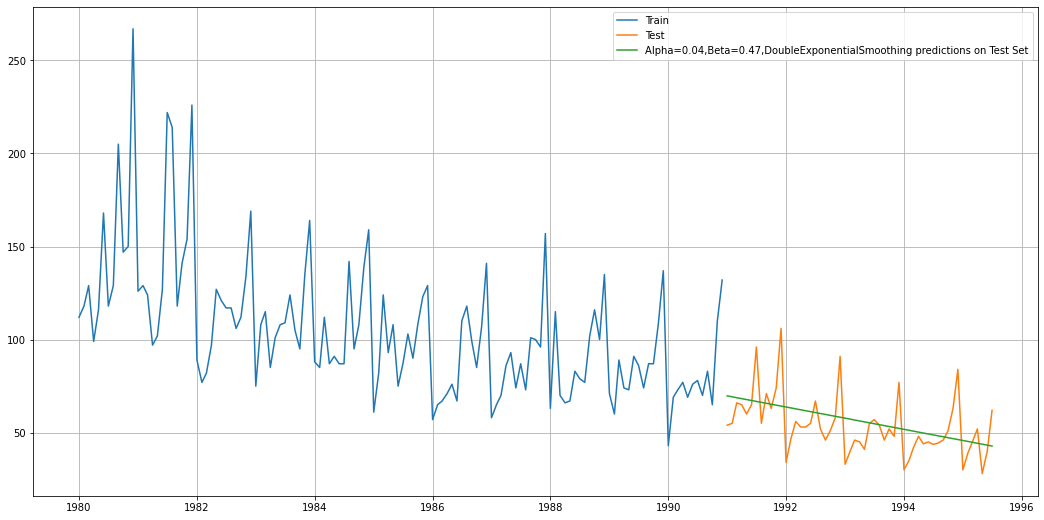

In [396]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Rose'], label='Train')
plt.plot(DES_test['Rose'], label='Test')

plt.plot(DES_test['predict', 0.03, 0.25], label='Alpha=0.04,Beta=0.47,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [398]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [resultsDf_7.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['Alpha=0.04,Beta=0.47,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

,Test RMSE
RegressionOnTime,15.29
NaiveModel,79.78
SimpleAverageModel,53.52
2 pointTrailingMovingAverage,11.53
4 pointTrailingMovingAverage,14.46
6 pointTrailingMovingAverage,14.59
9 pointTrailingMovingAverage,14.74
"Alpha=0.0987, SimpleExponentialSmoothing",36.86
"Alpha=0.07, SimpleExponentialSmoothing",36.50
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",14.58


## Method 7: Triple Exponential Smoothing (Holt - Winter's Model)

##### Three parameters $\alpha$, $\beta$ and $\gamma$ are estimated in this model. Level, Trend and Seasonality are accounted for in this model.

In [513]:
TES_train = train.copy()
TES_test = test.copy()

In [514]:
model_TES = ExponentialSmoothing(TES_train['Rose'],trend='additive',seasonal='additive')

In [515]:
model_TES_autofit = model_TES.fit()

The above fit of the model is by the best parameters that Python thinks for the model. It uses a brute force method to choose the parameters.

In [542]:
model_TES_autofit.params

{'smoothing_level': 0.08485622209289158,
 'smoothing_trend': 0.0005280630369796539,
 'smoothing_seasonal': 0.006764526794519119,
 'damping_trend': nan,
 'initial_level': 77.31958915163194,
 'initial_trend': -0.5501794952033382,
 'initial_seasons': array([ 38.63205024,  50.94041582,  59.06227683,  48.26306762,
         57.05566819,  62.6629802 ,  72.54958097,  78.56552615,
         74.62626287,  72.65336605,  90.54607132, 133.36580632]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [543]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
pd.options.display.float_format = '{:.2f}'.format
TES_test.head()

,Rose,auto_predict,"(predict, 0.01, 0.01, 0.01)","(predict, 0.01, 0.01, 0.02)","(predict, 0.01, 0.01, 0.03)","(predict, 0.01, 0.01, 0.04)","(predict, 0.01, 0.01, 0.05)","(predict, 0.01, 0.01, 0.060000000000000005)","(predict, 0.01, 0.01, 0.06999999999999999)","(predict, 0.01, 0.01, 0.08)",...,"(predict, 0.04, 0.66, 0.32)","(predict, 0.04, 0.66, 0.33)","(predict, 0.04, 0.66, 0.34)","(predict, 0.04, 0.66, 0.35000000000000003)","(predict, 0.04, 0.66, 0.36000000000000004)","(predict, 0.04, 0.66, 0.37)","(predict, 0.04, 0.66, 0.38)","(predict, 0.04, 0.66, 0.39)","(predict, 0.04, 0.66, 0.4)","(predict, 0.04, 0.66, 0.41000000000000003)"
YearMonth,,,,,,,,,,,,,,,,,,,,,
1991-01-01,54.00,42.61,70.24,69.18,68.19,67.27,66.41,65.60,64.86,64.16,...,46.14,46.07,45.99,45.90,45.81,45.71,45.61,45.50,45.38,45.26
1991-02-01,55.00,54.38,76.67,76.24,75.86,75.52,75.21,74.94,74.69,74.48,...,62.70,62.73,62.74,62.75,62.74,62.72,62.69,62.66,62.62,62.57
1991-03-01,66.00,61.93,87.08,86.32,85.63,84.99,84.40,83.85,83.34,82.88,...,67.35,67.32,67.29,67.26,67.22,67.18,67.14,67.10,67.07,67.03
1991-04-01,65.00,50.61,58.87,60.00,61.06,62.05,62.97,63.83,64.63,65.38,...,62.98,63.14,63.28,63.42,63.54,63.64,63.74,63.84,63.92,64.00
1991-05-01,60.00,58.84,74.71,74.96,75.18,75.36,75.52,75.65,75.75,75.82,...,62.79,62.70,62.61,62.50,62.40,62.28,62.17,62.06,61.94,61.83


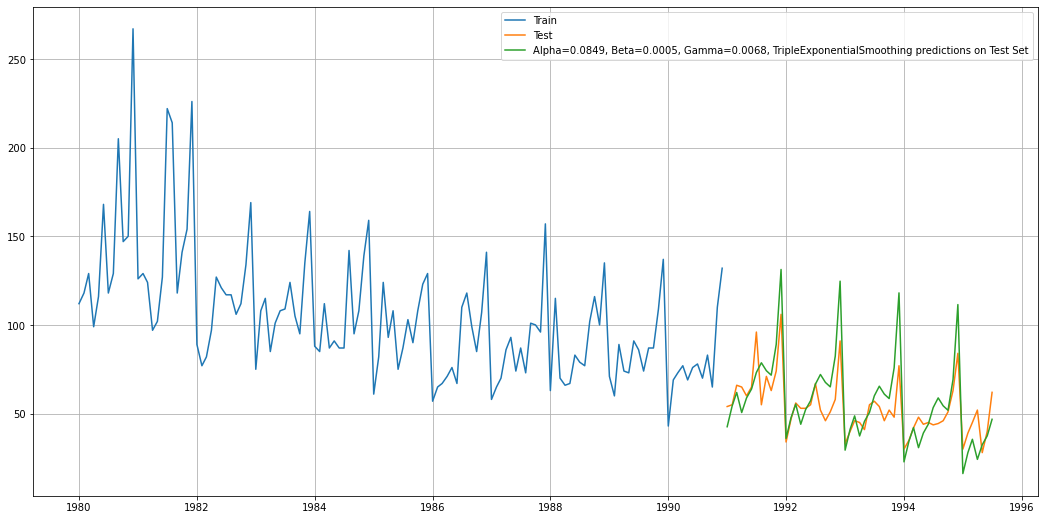

In [544]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

plt.plot(TES_test['auto_predict'], 
label='Alpha=0.0849, Beta=0.0005, Gamma=0.0068, TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [545]:
## Test Data

rmse_model6_test_1 = metrics.mean_squared_error(TES_test['Rose'],TES_test['auto_predict'],squared=False)
print("For Alpha=0.0849, Beta=0.0005, Gamma=0.0068, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model6_test_1))

For Alpha=0.0849, Beta=0.0005, Gamma=0.0068, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 14.298


In [546]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1]}
                           ,index=['Alpha=0.0849, Beta=0.0005, Gamma=0.0068,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

,Test RMSE,RMSE
RegressionOnTime,15.29,nan
NaiveModel,79.78,nan
SimpleAverageModel,53.52,nan
2 pointTrailingMovingAverage,11.53,nan
4 pointTrailingMovingAverage,14.46,nan
6 pointTrailingMovingAverage,14.59,nan
9 pointTrailingMovingAverage,14.74,nan
"Alpha=0.0987, SimpleExponentialSmoothing",36.86,nan
"Alpha=0.07, SimpleExponentialSmoothing",36.50,nan
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",14.58,nan


In [547]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_8_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE


In [530]:
for i in np.arange(0.01,0.5,0.01):
    for j in np.arange(0.01,0.1,0.01):
        for k in np.arange(0.01,0.1,0.01):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
        
            rmse_model8_train = metrics.mean_squared_error(TES_train['Rose'],TES_train['predict',i,j,k],squared=False)
            
            rmse_model8_test = metrics.mean_squared_error(TES_test['Rose'],TES_test['predict',i,j,k],squared=False)
            
            resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model8_train,'Test RMSE':rmse_model8_test}
                                                 , ignore_index=True)

In [531]:
pd.options.display.float_format = '{:.2f}'.format
resultsDf_8_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE
0,0.30,0.30,0.30,27.22,19.11
1,0.30,0.30,0.40,27.40,11.16
2,0.30,0.30,0.50,27.93,30.50
3,0.30,0.30,0.60,28.89,63.56
4,0.30,0.30,0.70,30.57,122.41
...,...,...,...,...,...
48447,0.49,0.09,0.05,35.59,68.77
48448,0.49,0.09,0.06,34.58,61.93
48449,0.49,0.09,0.07,33.69,55.57
48450,0.49,0.09,0.08,32.89,49.67


In [532]:
resultsDf_8_2.sort_values(by=['Test RMSE']).head(10)

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE
21971,0.03,0.65,0.28,25.75,8.47
21278,0.01,0.10,0.18,29.41,8.51
22176,0.04,0.50,0.22,25.51,8.52
21279,0.01,0.10,0.20,28.91,8.52
21970,0.03,0.65,0.26,25.91,8.55
22177,0.04,0.50,0.24,25.35,8.56
2833,0.05,0.40,0.22,25.00,8.65
22400,0.05,0.40,0.22,25.00,8.65
2834,0.05,0.40,0.23,24.93,8.65
21972,0.03,0.65,0.30,25.61,8.66


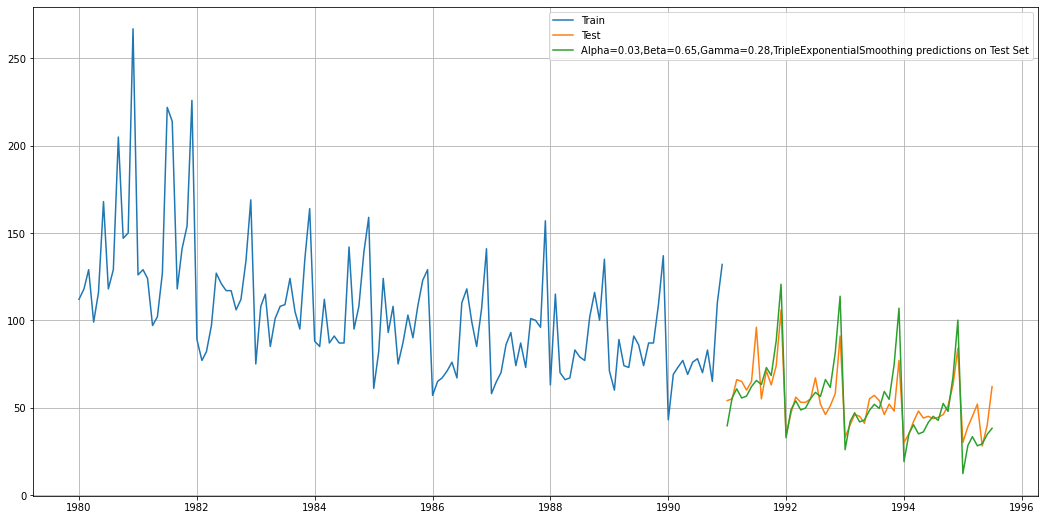

In [534]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict', 0.03, 0.65, 0.28], 
         label='Alpha=0.03,Beta=0.65,Gamma=0.28,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [548]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.03,Beta=0.65,Gamma=0.28,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf

IndexError: index 0 is out of bounds for axis 0 with size 0

In [549]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



,Test RMSE,RMSE
"Alpha=0.03,Beta=0.65,Gamma=0.28,TripleExponentialSmoothing",8.47,nan
"Alpha=0.03,Beta=0.65,Gamma=0.28,TripleExponentialSmoothing",8.47,nan
2 pointTrailingMovingAverage,11.53,nan
"Alpha=0.0849, Beta=0.0005, Gamma=0.0068,TripleExponentialSmoothing",14.30,nan
"Alpha=0.0656, Beta=0.0519, Gamma=3.8e-06,TripleExponentialSmoothing",14.30,nan
"Alpha=0.0656, Beta=0.0519, Gamma=3.8e-06,TripleExponentialSmoothing",14.30,nan
"Alpha=0.0849, Beta=0.0005, Gamma=0068,TripleExponentialSmoothing",14.30,nan
4 pointTrailingMovingAverage,14.46,nan
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",14.58,nan
"Alpha=0.04,Beta=0.47,DoubleExponentialSmoothing",14.58,nan


For this data, we had both trend and seasonality so by definition Triple Exponential Smoothing is supposed to work better than the Simple Exponential Smoothing as well as the Double Exponential Smoothing. However, since this was a model building exercise we had gone on to build different models on the data and have compared these model with the best RMSE value on the test data.

In this particular we have built several models and went through a model building exercise. This particular exercise has given us an idea as to which particular model gives us the least error on our test set for this data. But in Time Series Forecasting, we need to be very vigil about the fact that after we have done this exercise we need to build the model on the whole data. Remember, the training data that we have used to build the model stops much before the data ends. In order to forecast using any of the models built, we need to build the models again (this time on the complete data) with the same parameters.

For this particular mentored learning session, we will go ahead and build only the top 2 models which gave us the best accuracy (least RMSE).

## Question 5.
**Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.**

## Check for stationarity of the whole Time Series data.

### Dickey-Fuller Test:
#### H0: Series is NOT Staionary
#### H1: Series is Staionary

In [275]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=12).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

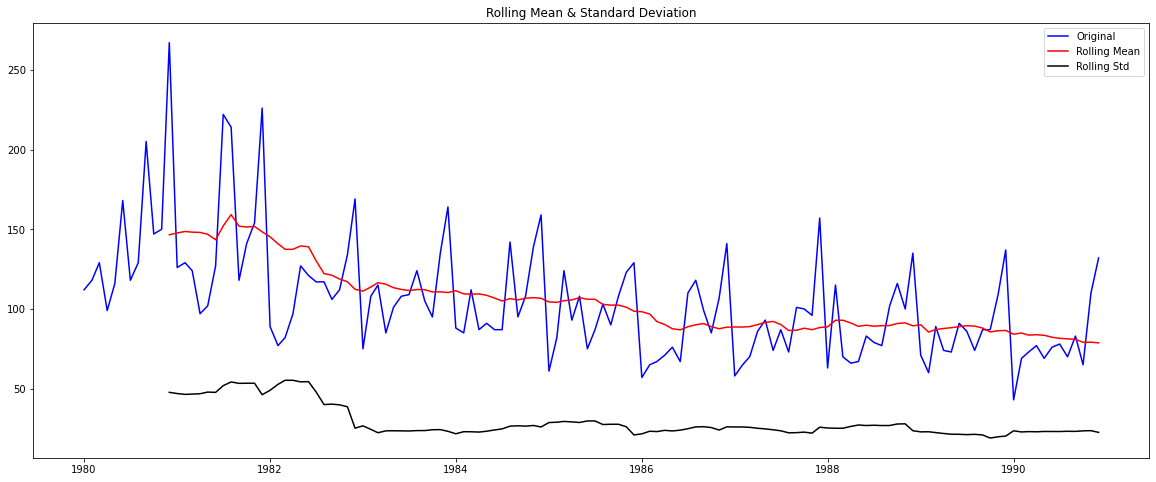

Results of Dickey-Fuller Test:
Test Statistic                 -2.16
p-value                         0.22
#Lags Used                     13.00
Number of Observations Used   118.00
Critical Value (1%)            -3.49
Critical Value (5%)            -2.89
Critical Value (10%)           -2.58
dtype: float64 



In [276]:
test_stationarity(train['Rose']) # Stationarity on train dataset.

**p-value is more than 0.05, H0 is failed to reject which means TS is not stationary.**\
**We will take a difference of order 1 and check whether the Time Series is stationary or not.**

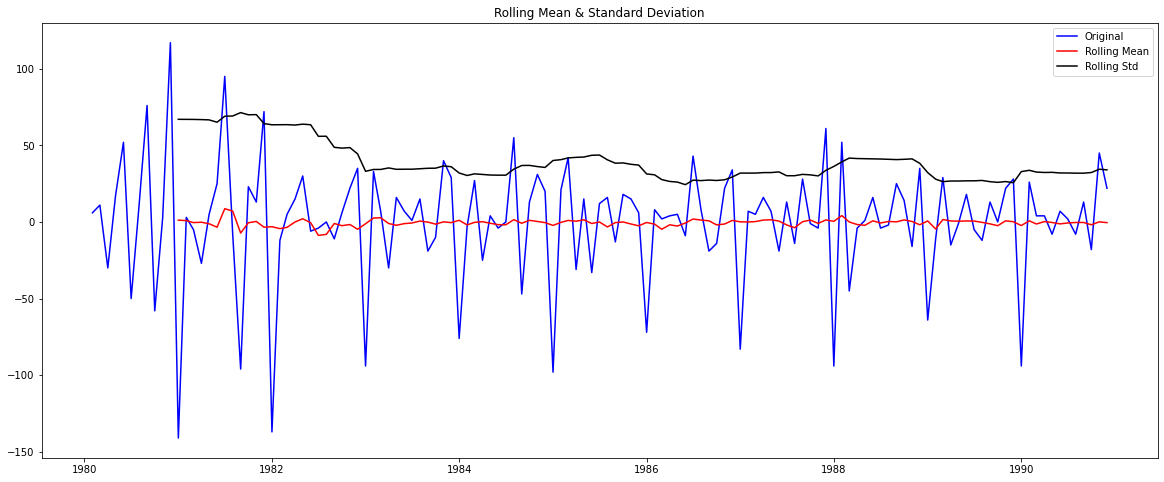

Results of Dickey-Fuller Test:
Test Statistic                 -6.59
p-value                         0.00
#Lags Used                     12.00
Number of Observations Used   118.00
Critical Value (1%)            -3.49
Critical Value (5%)            -2.89
Critical Value (10%)           -2.58
dtype: float64 



In [277]:
test_stationarity(train['Rose'].diff().dropna())

**With differencing (d=1), p-value is much lower than 0.05, thus rejecting H0 this time; means, now our TS has got stationary and we can build ARIMA/ SARIMA model.** 

##### Note: If the series is non-stationary, stationarize the Time Series by taking a difference of the Time Series. Then we can use this particular differenced series to train the ARIMA models. We do not need to worry about stationarity for the Test Data because we are not building any models on the Test Data, we are evaluating our models over there. You can look at other kinds of transformations as part of making the time series stationary like taking logarithms.

# Question 6.
**Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.**

## Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

Let us look at the ACF plot once more to understand the seasonal parameter for the SARIMA model.

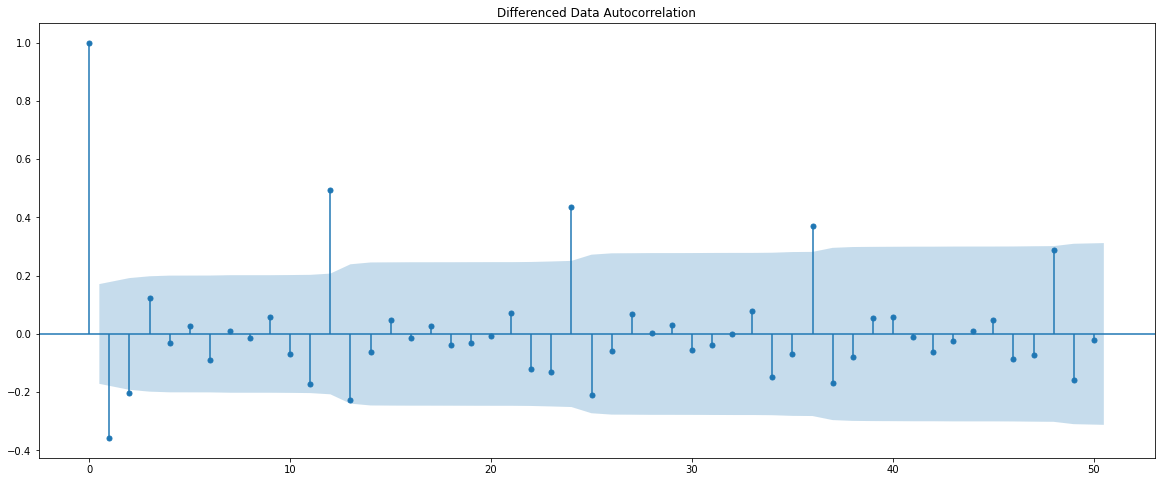

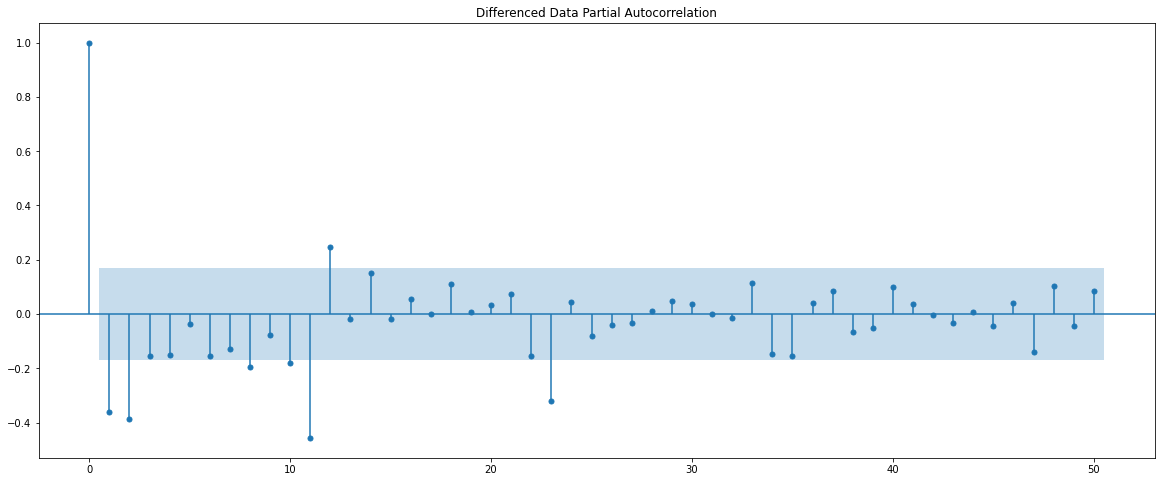

In [291]:
plot_acf(train['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(train['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

**We see that there is a seasonality of 12 in Rose dataset. We will run our auto SARIMA models by setting seasonality as 12.
The trend is also evident in the dataset.**

## Setting the seasonality as 12 for the auto SARIMA model in Rose dataset.

In [292]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [293]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [294]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1145.423082720733
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:976.4375296380911
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1139.921738995602
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1116.0207869386036
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:969.6913635753504
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:960.8812220353041
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:962.8794540697521
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:955.573540894562
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1263.5369097383964
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1098.5554825918337
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:923.6314049383859
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1095.793632491795
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1054.743433094527
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:918.8573483302789
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:914.5982866536075
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:915.3332430461672
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:901.1988271349375
SARIMA(0, 1, 2)x(0, 0, 0,

In [340]:
SARIMA_AIC.count()

param       81
seasonal    81
AIC         81
dtype: int64

In [295]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
26,"(0, 1, 2)","(2, 0, 2, 12)",887.94
53,"(1, 1, 2)","(2, 0, 2, 12)",889.90
80,"(2, 1, 2)","(2, 0, 2, 12)",890.67
69,"(2, 1, 1)","(2, 0, 0, 12)",896.52
78,"(2, 1, 2)","(2, 0, 0, 12)",897.35


In [296]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(0, 1, 2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -436.969
Date:                            Thu, 18 Feb 2021   AIC                            887.938
Time:                                    13:12:50   BIC                            906.448
Sample:                                         0   HQIC                           895.437
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8427    189.943     -0.004      0.996    -373.124     371.439
ma.L2         -0.1573     29.841   

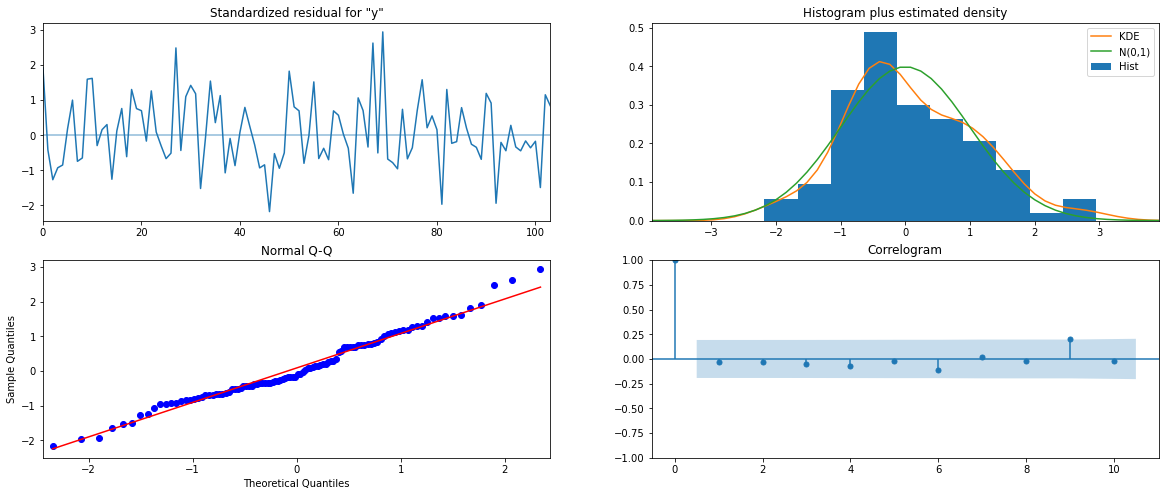

In [297]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

Similar to the last iteration of the model where the seasonality parameter was taken as 6, here also we see that the model diagnostics plot does not indicate any remaining information that we can get.

## Predict on the Test Set using this model and evaluate the model.

In [298]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))

In [299]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,62.87,15.93,31.65,94.09
1,70.54,16.15,38.89,102.19
2,77.36,16.15,45.71,109.01
3,76.21,16.15,44.56,107.86
4,72.75,16.15,41.10,104.40


In [300]:
rmse = mean_squared_error(test['Rose'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print(rmse)

26.991266868809305


In [301]:
# choose bt this code and below one:

temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(0,1,2)(2,0,2,12)'])

# resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf = temp_resultsDf

resultsDf

,RMSE
"SARIMA(0,1,2)(2,0,2,12)",26.99


# Question- 7:
**Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.**

## Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots. - Seasonality is 12.

Let us look at the ACF and the PACF plots once more to determine non-seasonal AR, differencing & MA values (p, d, q).

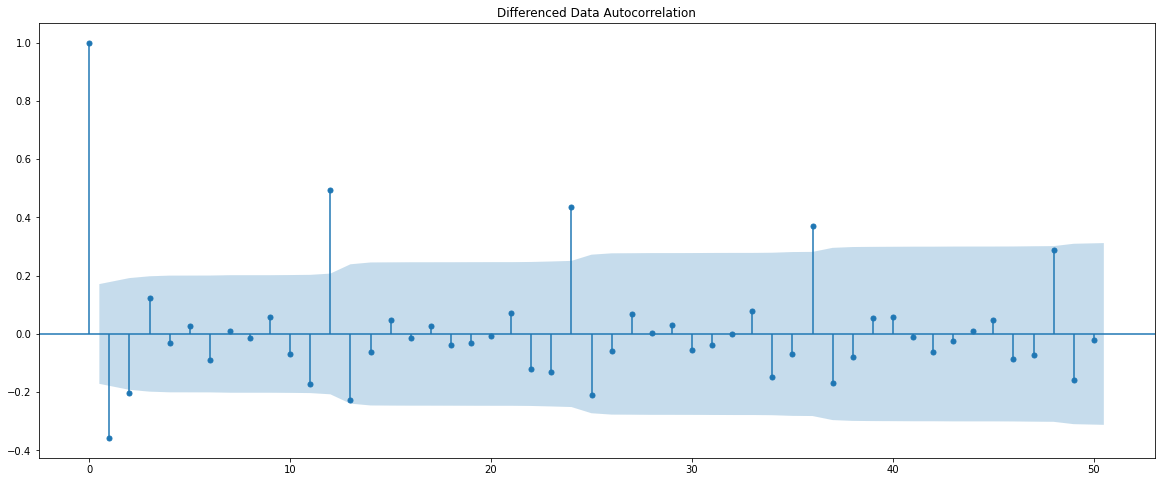

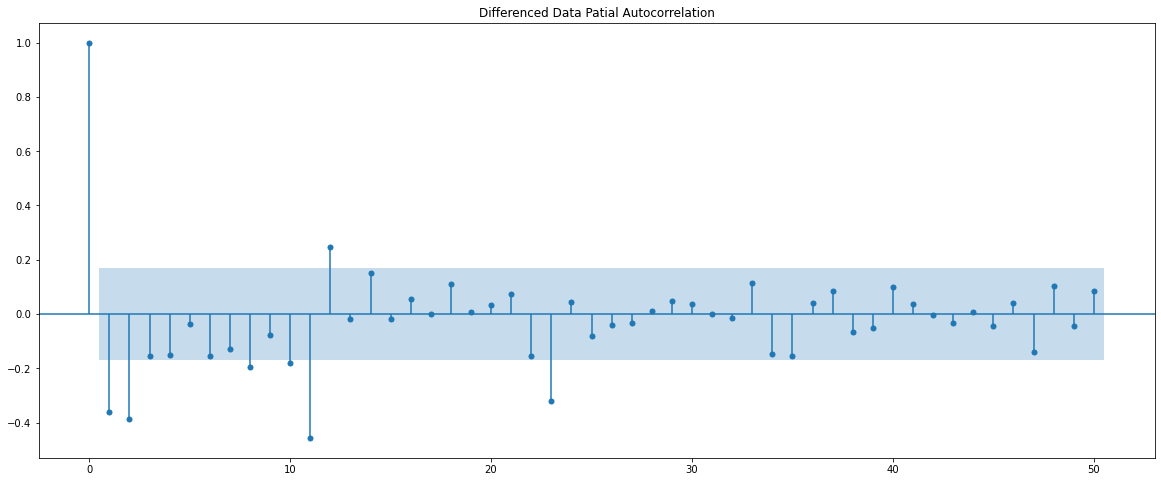

In [429]:
plot_acf(train['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(train['Rose'].diff().dropna(),lags=50,title='Differenced Data Patial Autocorrelation')
plt.show()

We see that our ACF plot has seasonal interval at 12. So, we go ahead and take a seasonal differencing of trained data. Before that let us look at the trained series.

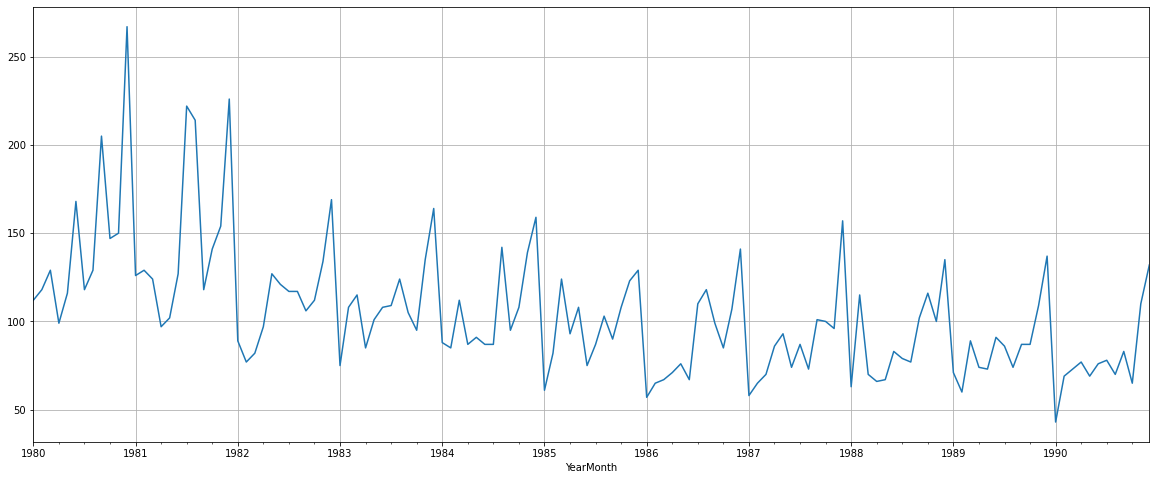

In [303]:
train['Rose'].plot()
plt.grid();

We see that there is a trend along with seasonality. We are taking a seasonal differencing and check the series.

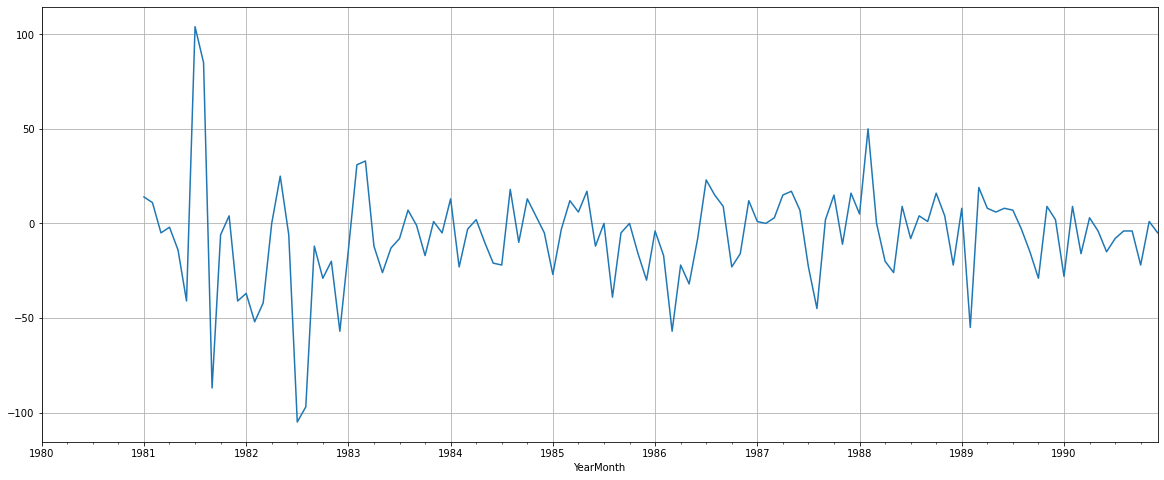

In [304]:
(train['Rose'].diff(12)).plot()
plt.grid();

After doing seasonal differencing, we find the time series doesn't have any trend in the data. No need to apply any further differencing. However, seasonality is still present in data. 

In [305]:
# (train['Rose'].diff(12)).diff().plot()
# plt.grid();  # no need to do any further differencing as TS doesnt show any trend.

Let us go ahead and check the stationarity of the above series before fitting the SARIMA model.

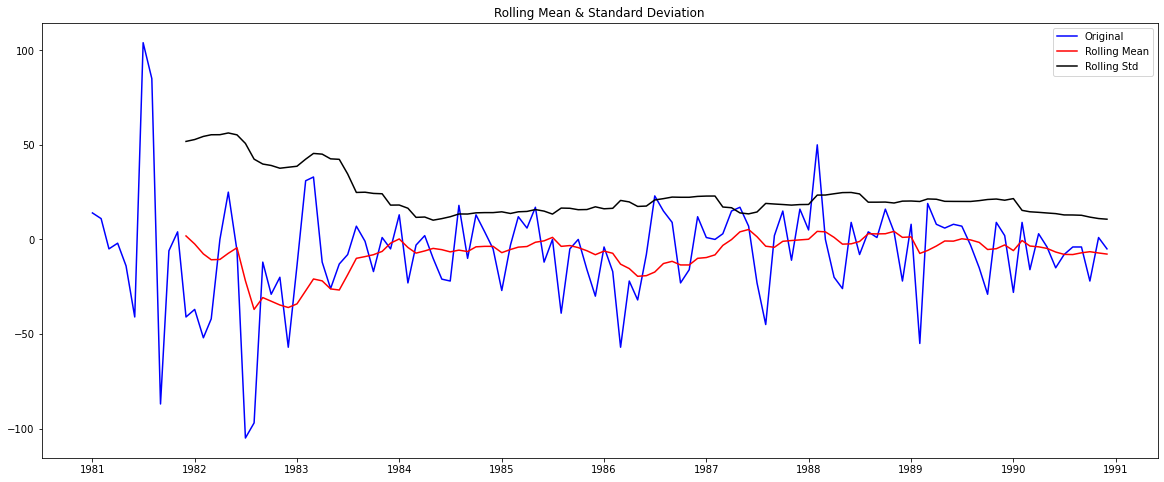

Results of Dickey-Fuller Test:
Test Statistic                 -3.62
p-value                         0.01
#Lags Used                     11.00
Number of Observations Used   108.00
Critical Value (1%)            -3.49
Critical Value (5%)            -2.89
Critical Value (10%)           -2.58
dtype: float64 



In [430]:
test_stationarity((train['Rose'].diff(12).dropna()))

p-value is less than 0.05, H0 is rejected means trained series is stationary and we can build the model.

Checking the ACF and the PACF plots for the new modified Time Series.

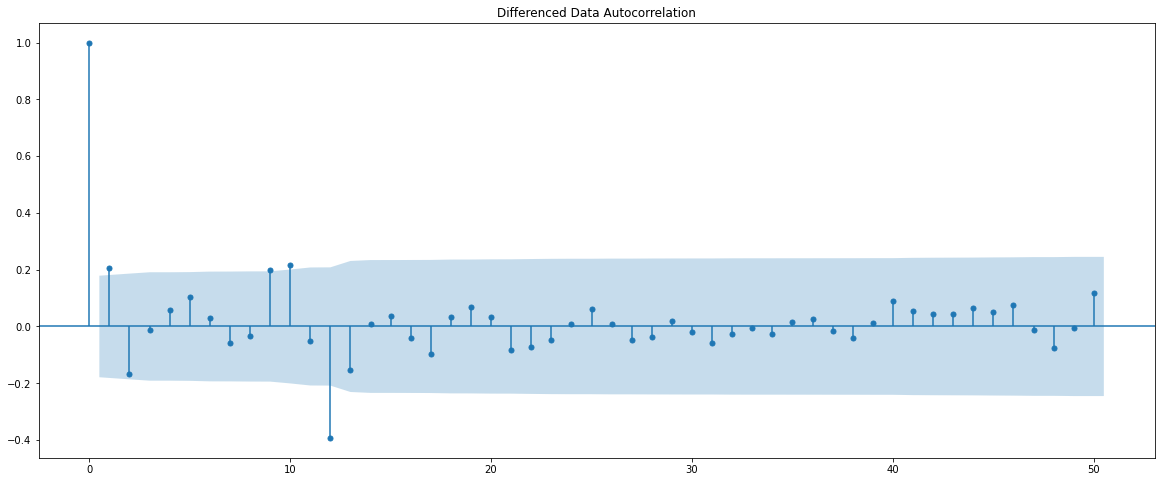

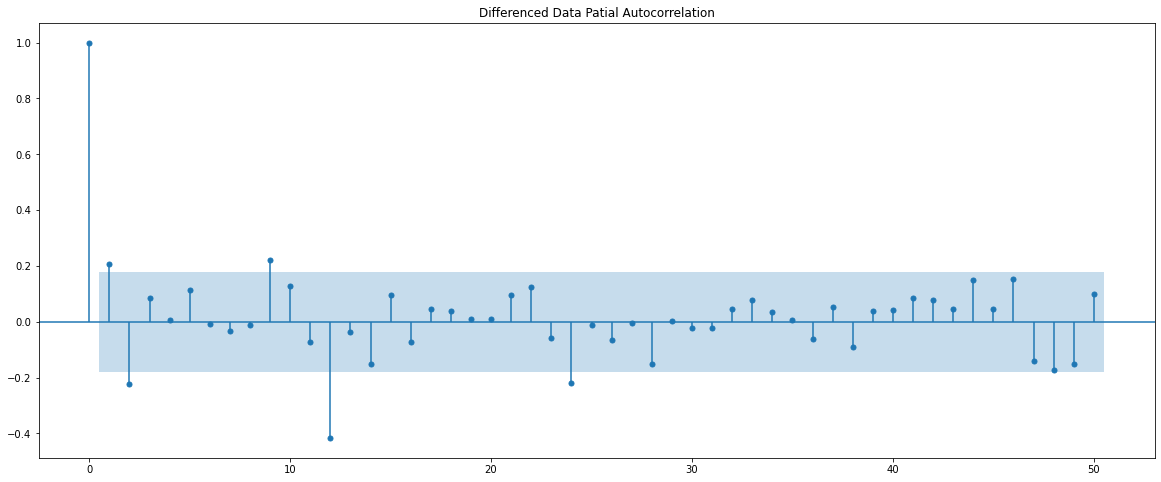

In [431]:

plot_acf(train['Rose'].diff(12).dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(train['Rose'].diff(12).dropna(),lags=50,title='Differenced Data Patial Autocorrelation')
plt.show()

Here, we have taken alpha=0.05.

We are going to take the seasonal period as 12.
We will keep the p(1) and q(1) parameters same as the ARIMA model.

* The Auto-Regressive parameter in an SARIMA model is 'P' which comes from the significant lag after which the PACF plot cuts-off to 0. 
* The Moving-Average parameter in an SARIMA model is 'Q' which comes from the significant lag after which the ACF plot cuts-off to 0.
Remember to check the ACF and the PACF plots only at multiples of 12 (since 12 is the seasonal period).

By looking at the plots we see that the ACF and the PACF do not directly cut-off to 0.

This is a common problem while building models by looking at the ACF and the PACF plots. But we are able to explain the model. 

Please do play around with the data and try out different kinds of transformations and different levels of differencing on this data. We have not taken the logarithm of the series and then trying it out.

Please do refer to $\href{https://online.stat.psu.edu/stat510/lesson/4/4.1}{this\ link}$ to read more about Seasonal Auto-Regressive Integrtaed Moving Average Models.

In [ ]:
SARIMA(0,1,2)(2,0,2,12)	26.99

In [493]:
import statsmodels.api as sm

manual_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(1,1,1),
                                seasonal_order=(2,1,1,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_12 = manual_SARIMA_12.fit(maxiter=1000)
print(results_manual_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -389.953
Date:                            Wed, 24 Feb 2021   AIC                            791.907
Time:                                    00:20:28   BIC                            807.166
Sample:                                         0   HQIC                           798.070
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0790      0.117      0.675      0.500      -0.150       0.308
ma.L1         -0.9817      0.131   

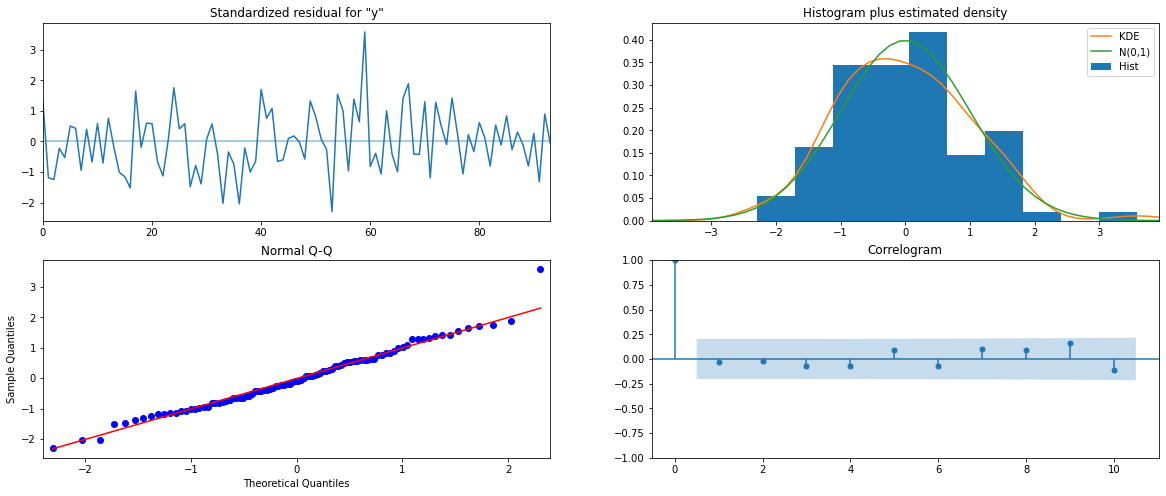

In [494]:
results_manual_SARIMA_12.plot_diagnostics()
plt.show()

The model diagnostics plot looks okay.

## Predict on the Test Set using this model and evaluate the model.

In [495]:
predicted_manual_SARIMA_12 = results_manual_SARIMA_12.get_forecast(steps=len(test))

In [496]:
predicted_manual_SARIMA_12.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,45.11,14.33,17.02,73.21
1,62.54,14.41,34.30,90.78
2,67.70,14.41,39.45,95.96
3,63.37,14.42,35.11,91.63
4,66.45,14.42,38.18,94.71


In [497]:
rmse = mean_squared_error(test['Rose'],predicted_manual_SARIMA_12.predicted_mean,squared=False)
print(rmse)

16.757855674414923


In [437]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(1,1,)(2,1,1,12)'])

resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,Test RMSE,RMSE
RegressionOnTime,15.29,nan
NaiveModel,79.78,nan
SimpleAverageModel,53.52,nan
2 pointTrailingMovingAverage,11.53,nan
4 pointTrailingMovingAverage,14.46,nan
6 pointTrailingMovingAverage,14.59,nan
9 pointTrailingMovingAverage,14.74,nan
"Alpha=0.0987, SimpleExponentialSmoothing",36.86,nan
"Alpha=0.07, SimpleExponentialSmoothing",36.50,nan
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",14.58,nan


# Question 8:
**Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.**

In [314]:
Model name, parameters, RMSE on test.

SyntaxError: invalid syntax (<ipython-input-314-8023e3353f52>, line 1)

# Question 9:
**Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.**

## Building the most optimum model on the Full Data.

In [498]:
# Model TES

TES_train = train.copy()
TES_test = test.copy()
TES_fulldata = df_1['Rose'].copy()

## Evaluate the model on the whole and predict 12 months into the future (between Aug-1995 until July-1996)

In [499]:
# model_TES = ExponentialSmoothing(TES_train['Sparkling'],trend='additive',seasonal='additive')

model_TES_fulldata = ExponentialSmoothing(df_1['Rose'],trend='additive',seasonal='additive',
        initialization_method= 'known',
        initial_level=0.03,
    initial_trend=0.65,
    initial_seasonal=0.28,
    seasonal_periods= 12)

In [500]:
model_TES_fulldata_fit = model_TES_fulldata.fit()

In [501]:
TES_predict_fulldata = model_TES_fulldata_fit.forecast(steps=12)

In [552]:
print("Future prediction for 12 months starting from Aug-1995 on Rose sales: \n")
TES_predict_fulldata.head(12).to_frame().T

Future prediction for 12 months starting from Aug-1995 on Rose sales: 



,1995-08-01,1995-09-01,1995-10-01,1995-11-01,1995-12-01,1996-01-01,1996-02-01,1996-03-01,1996-04-01,1996-05-01,1996-06-01,1996-07-01
0,49.82,46.72,45.46,60.06,98.33,13.85,24.15,31.72,24.53,27.91,33.40,43.95


In [553]:
df_1.Rose.tail(12)

YearMonth
1994-08-01   44.40
1994-09-01   46.00
1994-10-01   51.00
1994-11-01   63.00
1994-12-01   84.00
1995-01-01   30.00
1995-02-01   39.00
1995-03-01   45.00
1995-04-01   52.00
1995-05-01   28.00
1995-06-01   40.00
1995-07-01   62.00
Name: Rose, dtype: float64

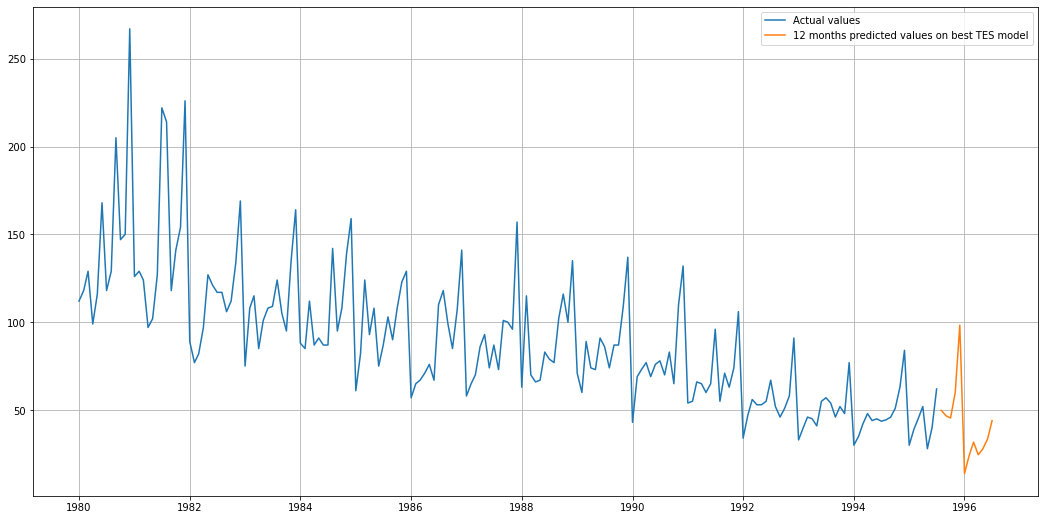

In [503]:
plt.figure(figsize=(18,9))
plt.plot(TES_fulldata, label='Actual values')
plt.plot(TES_predict_fulldata, label='12 months predicted values on best TES model')

plt.legend(loc='best')
plt.grid();

In [504]:
## RMSE Score on full Data
TES_predict_fulldata_rmse = model_TES_fulldata_fit.forecast(steps=187)

rmse_fulldata = metrics.mean_squared_error(TES_fulldata,TES_predict_fulldata_rmse,squared=False)
print("For Alpha=0.03,Beta=0.65,Gamma=0.28, Triple Exponential Smoothing Model forecast on full data,  RMSE is %3.3f" %(rmse_fulldata))

For Alpha=0.03,Beta=0.65,Gamma=0.28, Triple Exponential Smoothing Model forecast on full data,  RMSE is 101.914


In [506]:
# model building on test data.

# model_TES = ExponentialSmoothing(TES_train['Sparkling'],trend='additive',seasonal='additive')

model_TES_test = ExponentialSmoothing(train['Rose'],trend='additive',seasonal='additive',
        initialization_method= 'known',
        initial_level=0.03,
    initial_trend=0.65,
    initial_seasonal=0.28,
    seasonal_periods= 12)

In [507]:
model_TES_test_fit = model_TES_test.fit()

In [508]:
model_TES_test_predict = model_TES_test_fit.forecast(steps=55)

In [511]:
model_TES_test_predict.to_frame().head()

,0
1991-01-01,42.69
1991-02-01,54.47
1991-03-01,61.92
1991-04-01,50.72
1991-05-01,59.02


In [512]:
## RMSE Score on test Data

rmse_test = metrics.mean_squared_error(test,model_TES_test_predict,squared=False)
print("For Alpha=0.03,Beta=0.65,Gamma=0.28, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_test))

For Alpha=0.03,Beta=0.65,Gamma=0.28, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 14.341


# END